# Bussines question:


RESEARCH OBJECTIVES: Real Estate Market Optimization using Machine Learning

<b>business question:<b/> How can housing attributes help predict and improve property pricing?

Which factors influence property pricing and how can machine learning models identify these factors and predict the house pricing?

sub-question:
- what is the most important variable in predicting house pricing (last sub-question related to explainability)

🔘 1. How can machine learning models be utilized to analyze, predict, and explain factors affecting property valuation and demand?
Application of regression models (Linear Regression, Random Forest, Neural Networks) for property price prediction.
Identification of the most influential factors (e.g., location, size, energy efficiency, market trends).
🔘 2. Can classification models predict the likelihood of a property selling within a specific time frame?
Binary classification (sold fast vs. slow) using Logistic Regression, Decision Trees, and XGBoost.
Impact of property features, pricing, and marketing on sales speed.
🔘 3. How can clustering techniques segment the real estate market into meaningful groups for targeted investment and pricing strategies?
Unsupervised learning (K-Means, DBSCAN) to group properties based on price, location, and features.
Identifying high-value investment clusters vs. slow-selling regions.
🔵 Bonus:
Can natural language processing (NLP) extract insights from property descriptions to enhance price and sales predictions?

BERT embeddings & Topic Modeling (BERTopic) for analyzing property descriptions.
Identifying descriptive keywords that correlate with high sales and price appreciation.

### <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">1. Importing Libraries</span>




In [36]:
# Importing basic Librarie

# ==============================
# Data Manipulation & Analysis
# ==============================
import numpy as np  # Numerical operations and array handling
import pandas as pd  # Data manipulation and analysis
import polars as pl  # Alternative high-performance dataframe library

# ==============================
# Statistical Analysis
# ==============================
import scipy.stats as stats  # Statistical functions and hypothesis testing
from scipy.stats import (
    f_oneway,  # ANOVA test
    kruskal,  # Kruskal-Wallis H-test
    levene,  # Levene test for equal variances
    shapiro,  # Shapiro-Wilk test for normality
    randint  # Random integers for distributions
)
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # Post-hoc Tukey's test

# ==============================
# Data Visualization
# ==============================
import matplotlib.pyplot as plt  # Core plotting library
import seaborn as sns  # Statistical data visualization
import graphviz  # Visualizing decision trees
from wordcloud import WordCloud  # Generate word clouds

# Matplotlib specific imports
import matplotlib.colors as mcolors  # Color manipulation for plots
from matplotlib.colors import ListedColormap  # Custom colormaps
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

# Advanced visualization tools
from plotnine import *  # Grammar of graphics for Python (ggplot-like)

from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import skew
from IPython.display import display
from IPython.display import display, Markdown
import textwrap
from IPython.core.display import display, HTML

# Display the filtered rows
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import matplotlib.font_manager as fm
import matplotlib
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\josel\AppData\Local\Temp\ipykernel_18068\1948119916.py:48: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display


In [4]:
pip install 

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


### <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">2. Reading Files</span>


In [5]:
# Defining file paths
funda_housing_dataset_path = r"C:\Users\josel\OneDrive\Documents\block 3\Resit AI\housing_data.csv"

#read csv file
funda_housing_df = pd.read_csv(funda_housing_dataset_path)

# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">3. Exploratory Data Analysis </span>

## <span style="color: #8DB3B1; font-size: 36px; font-family: 'Times New Roman'; font-weight: bold;">3.1 Overview of the Funda dataset and its attributes</span>


### 3.1.1 Analysis of the Funda housing dataset - understanding the given columns

In [6]:
# View the first 20 row of the funda housing data set
funda_housing_df

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening
0,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",<{woonboot}> <{vrijstaande woning}>,<{Woonhuis}>,1971-1980,1,NaN,09F114F5C5EC061F6230349892132149,3,NaN,NaN,4388064,62,2018-11-12
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1980,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,1.0,B,4388200,136,2018-08-30
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,<{tussenverdieping}> (<{appartement}>),<{Appartement}>,2001-2010,0,NaN,E983FEDC63D87BF61AE952D181C8FD17,3,NaN,NaN,4399344,70,2018-11-23
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,<{Woonhuis}>,1973,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,NaN,NaN,4400638,144,2018-12-14
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,<{woonboerderij}> <{vrijstaande woning}>,<{Woonhuis}>,1900,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,1.0,NaN,4401765,323,2018-12-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211612,4613507,2018-12-31,9791GD,159000.0,Ruime eengezinswoning aangeboden aan de rand v...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1974,1,195.0,AB928B88F4860C427BB7C6A27D6F2642,5,NaN,NaN,4613507,116,2019-03-07
211613,4613532,2018-12-31,6431GT,179000.0,Nabij centrum van Hoensbroek met al haar voorz...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,<{Woonhuis}>,1995,1,160.0,4271E4C370DF497EE3BB23B3AED3E292,4,1.0,NaN,4613532,84,2019-01-17
211614,4613537,2018-12-31,4051EW,391500.0,Ook de kans aangrijpen om te mogen wonen in de...,<{bungalow}> <{vrijstaande woning}> (<{semi-bu...,<{Woonhuis}>,1948,1,465.0,AB928B88F4860C427BB7C6A27D6F2642,5,NaN,NaN,4613537,99,2019-08-03
211615,4613566,2018-12-31,4043GG,375000.0,"BIEDEN VANAF € 375.000,= kosten koper\nHet uit...",<{eengezinswoning}> <{2-onder-1-kapwoning}>,<{Woonhuis}>,2006,1,300.0,59A3951B92EB2334DC7295CEEA0FB547,7,1.0,A,4613566,172,2019-04-08


#### <span style="color: #7AD6C7; font-size: 36px; font-weight: bold;">Explanation of the Funda Housing Dataset</span>

The **Funda Housing Dataset** provides a detailed information about real estate listings in the Netherlands. 
Each row represents a property listed with attributes such as location, pricing, features, and energy efficiency.

➤ <span style='color: #7AD6C7;'>globalId:</span>  Unique identifier for the property listing  <br>  
➤ <span style='color: #7AD6C7;'>publicatieDatum:</span>  The date when the house or property was published  <br>  
➤ <span style='color: #7AD6C7;'>postcode:</span>  Postal code of the property’s location  <br>  
➤ <span style='color: #7AD6C7;'>koopPrijs:</span>  Purchase price of the property in euros  <br>  
➤ <span style='color: #7AD6C7;'>volledigeOmschrijving:</span>  Full description of the property  <br>  
➤ <span style='color: #7AD6C7;'>soortWoning:</span>  Type of house (e.g., boat house, apartment, detached)  <br>  
➤ <span style='color: #7AD6C7;'>categorieObject:</span>  Category of the object (e.g., residential)  <br>  
➤ <span style='color: #7AD6C7;'>bouwjaar:</span>  Year the property was built  <br>  
➤ <span style='color: #7AD6C7;'>indTuin:</span>  Indicates if the property has a garden  <br>  
➤ <span style='color: #7AD6C7;'>perceelOppervlakte:</span>  Total land area of the property (m²)  <br>  
➤ <span style='color: #7AD6C7;'>kantoor_naam_MD5hash:</span>  Hashed identifier of the real estate agency  <br>  
➤ <span style='color: #7AD6C7;'>aantalKamers:</span>  Number of rooms in the property  <br>  
➤ <span style='color: #7AD6C7;'>aantalBadkamers:</span>  Number of bathrooms in the property  <br>  
➤ <span style='color: #7AD6C7;'>energielabelKlasse:</span>  Energy efficiency rating (A, B, C, etc.)  <br>  
➤ <span style='color: #7AD6C7;'>globalId.1:</span>  Another unique identifier   <br>  
➤ <span style='color: #7AD6C7;'>oppervlakte:</span>  Total living area of the property (m²)  <br>  
➤ <span style='color: #7AD6C7;'>datum_ondertekening:</span>  Date of contract signing  <br>  










### 3.1.2 Analyzing the features/ columns aspects

In [7]:
#source chatgpt

# Create a copy of the dataset
df_funda_imputed = funda_housing_df.copy()

# Generate a summary table with column info
df_summary = pd.DataFrame({
    "Column": funda_housing_df.columns,
    "Data Type": funda_housing_df.dtypes.values,
    "Non-Null Count": funda_housing_df.notna().sum().values,
    "Unique Values": funda_housing_df.nunique().values
})

# Add Min and Max values for numerical columns (round float values to 1 decimal)
df_summary["Min Value"] = df_summary["Column"].apply(lambda col: round(funda_housing_df[col].min(), 1) if np.issubdtype(funda_housing_df[col].dtype, np.floating) else funda_housing_df[col].min() if np.issubdtype(funda_housing_df[col].dtype, np.number) else "N/A")
df_summary["Max Value"] = df_summary["Column"].apply(lambda col: round(funda_housing_df[col].max(), 1) if np.issubdtype(funda_housing_df[col].dtype, np.floating) else funda_housing_df[col].max() if np.issubdtype(funda_housing_df[col].dtype, np.number) else "N/A")

# Ensure bouwjaar is included in Min and Max calculations
df_summary.loc[df_summary["Column"] == "bouwjaar", "Min Value"] = funda_housing_df["bouwjaar"].min()
df_summary.loc[df_summary["Column"] == "bouwjaar", "Max Value"] = funda_housing_df["bouwjaar"].max()

# Ensure publicatieDatum is included in Min and Max calculations
df_summary.loc[df_summary["Column"] == "publicatieDatum", "Min Value"] = funda_housing_df["publicatieDatum"].min()
df_summary.loc[df_summary["Column"] == "publicatieDatum", "Max Value"] = funda_housing_df["publicatieDatum"].max()

# Find columns with unique values less than 13
low_unique_columns = df_summary[df_summary["Unique Values"] < 13]["Column"].tolist()

# Create a DataFrame to store unique values of these columns
unique_values_data = {
    "Column": [],
    "Unique Values": []
}

for col in low_unique_columns:
    unique_values_data["Column"].append(col)
    unique_values_data["Unique Values"].append(", ".join(map(str, funda_housing_df[col].unique())))

df_unique_values = pd.DataFrame(unique_values_data)

# Display the tables
print("\n📌 **Dataset Summary**")
display(df_summary.style.set_properties(**{'border': '1px solid lightblue', 'font-weight': 'bold'}, subset=['Column']))

print("\n📌 **Columns with Unique Values Below 13**")
display(df_unique_values.style.set_properties(**{'border': '1px solid lightblue', 'font-weight': 'bold'}, subset=['Column']))





📌 **Dataset Summary**


,Column,Data Type,Non-Null Count,Unique Values,Min Value,Max Value
0,globalId,int64,211617,211617,2567727,4613566
1,publicatieDatum,object,211617,365,2018-01-01,2018-12-31
2,postcode,object,211617,127150,N/A,N/A
3,koopPrijs,float64,210876,4439,215.000000,9950000.000000
4,volledigeOmschrijving,object,211617,194392,N/A,N/A
5,soortWoning,object,211617,359,N/A,N/A
6,categorieObject,object,211617,2,N/A,N/A
7,bouwjaar,object,211617,413,1005,<{Voor}> 1906
8,indTuin,int64,211617,2,0,1
9,perceelOppervlakte,float64,144376,4726,10.000000,312195.000000



📌 **Columns with Unique Values Below 13**


,Column,Unique Values
0,categorieObject,"<{Woonhuis}>, <{Appartement}>"
1,indTuin,"1, 0"
2,aantalBadkamers,"nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0"
3,energielabelKlasse,"nan, B, C, E, G, A, D, F, A+++, A++, A+, A++++, A+++++"


#### <span style="color: #7AD6C7; font-size: 36px; font-weight: bold;">**Analysis of Unique Categorical Values from the Funda Dataset**</span>



**<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Understanding the Dataset Structure</span>**  

The table above provides a detailed **summary of the dataset**, which shows the **data types, non-null counts, and the number of unique values per column**.  

This gives a better overview of the **distribution of the data, potential missing values, and categorical distinctions**, the NaN values are further analyzed in **Chapter 3.2**.  

---

**<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Key Observations</span>**  

- **Columns with the highest unique values**:  

  - **<span style="color:#7AD6C7;">globalId</span>** → 211,617 unique values, meaning each row has a unique identifier, as the total number of rows is also 211,617.  
  - **<span style="color:#7AD6C7;">postcode</span>** → 127,150 unique values, which indicates a wide range of property locations.  
  - **<span style="color:#7AD6C7;">koopPrijs</span>** → 4,439 unique values, showing significant variation in house prices.  
  - **<span style="color:#7AD6C7;">volledigeOmschrijving</span>** → 194,392 unique descriptions, suggesting this column contains **rich textual data**.  

<br>  

- **Columns with the lowest unique values** (displayed in the second table):  

  - **<span style="color:#7AD6C7;">categorieObject</span>** → Only **2 unique values** (`Woonhuis`, `Appartement`), which shows that the properties sold in this dataset are either houses or apartments.  
  - **<span style="color:#7AD6C7;">indTuin</span>** → **2 unique values** (`0, 1`), indicating whether there is a garden (`1`) or no garden (`0`).  
  - **<span style="color:#7AD6C7;">aantalBadkamers</span>** → **8 unique values**, showing variation in the number of bathrooms from **1 to 8**.  
  - **<span style="color:#7AD6C7;">energielabelKlasse</span>** → **12 unique values**, this column includes energy ratings from **B to G** and highly efficient labels like **A+, A++, A+++**.  

---

**<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Next Steps</span>**  

- **Investigate Missing Values** → Some columns, like **<span style="color:#7AD6C7;">koopPrijs</span>** and **<span style="color:#7AD6C7;">energielabelKlasse</span>**, among others, have missing values that may need imputation.  
- **Investigate bouwjaar column** as the oldest construction year dates back to 1005, which seems unreasonable. 
- **Investigate koopprijs column** as the lowest value is 215 euros, which is not a reasonable price, therefore the house description will be checked in order to see if its price per square meter or an error. 

## <span style="color: #8DB3B1; font-size: 36px; font-family: 'Times New Roman'; font-weight: bold;">3.2 Cleaning the Funda housing dataset
</span>




In chapter 3.2, duplicates will be removed and teh dataset will be analysed or checked wether it contains nan values.

### 3.2.1 Checking for inconsistencies in columns and cleaning them

NOTE: the codes in this section were generated with the help of chatgpt

In [8]:
# source chatgpt

# Function to check for inconsistencies like letters or symbols in numerical columns
def find_inconsistent_columns(df):
    exclude_columns = {'soortWoning', 'categorieObject', 'volledigeOmschrijving', 'kantoor_naam_MD5hash', 'energielabelKlasse'}  # exclude these because they are categorical and they were already analyzed in previous codes for the amount of unique values.
    inconsistent_columns = set()  # Use a set to avoid duplicates
    
    for col in df.select_dtypes(include=['object']).columns:  # Checking object type columns
        if col not in exclude_columns:
            non_numeric = df[col][~df[col].astype(str).str.replace(r'[\d.-]', '', regex=True).eq('')]
            if not non_numeric.empty:
                inconsistent_columns.add(col)  # Store only column names
    
    # Check postcode format (4 digits followed by 2 letters)
    if 'postcode' in df.columns:
        invalid_postcodes = df['postcode'][~df['postcode'].astype(str).str.match(r'^[0-9]{4}[A-Za-z]{2}$', na=False)]
        if not invalid_postcodes.empty:
            inconsistent_columns.add('postcode')
    
    return list(inconsistent_columns)

# Run the check on funda_housing_df and get the inconsistent column names
inconsistent_column_names = find_inconsistent_columns(funda_housing_df)

# Formatting the output as bullet points with bold font size 25
output_text = "** Columns with Inconsistencies:**\n\n"
for col in inconsistent_column_names:
    output_text += f"- **{col}**\n"

# Display the formatted output
display(Markdown(f"<span style='font-size:25px'>{output_text}</span>"))


<span style='font-size:25px'>** Columns with Inconsistencies:**

- **bouwjaar**
- **postcode**
</span>


**<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Analysis of the outcome:</span>**  

The above columns will be further analysed in step A and step B below, in order to check in each of these columns which values are inconsistent or strange character that do not represent any value or meaning for the dataset.

---
---

#### **<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;"> Step A) Checking first the column of construction date (bouwjaar)</span>**  


note: sources used in this section is chatgpt.

In [9]:
# Function to filter houses constructed before 1500 and count them
def filter_old_houses(df):
    if 'bouwjaar' in df.columns:
        # Convert bouwjaar to numeric (handling errors)
        df['bouwjaar'] = pd.to_numeric(df['bouwjaar'], errors='coerce')
        old_houses = df[df['bouwjaar'] < 1500]  # Select full rows
        count_old_houses = old_houses.shape[0]
        return count_old_houses, old_houses
    return 0, pd.DataFrame()

# Run the check on funda_housing_df for houses built before 1500
count_old_houses, df_old_houses = filter_old_houses(funda_housing_df)

# Display the count and then the full dataset rows
print(f"Total number of houses built before 1500: {count_old_houses}")
display(df_old_houses)

Total number of houses built before 1500: 22


,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening
1341,4492638,2018-10-25,3433AE,309500.0,"Mooie hoekwoning met een royale voor, zij en a...",<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1195.0,0,251.0,F70AF8821C445CC2FE6CC78DD5D1863D,4,NaN,A,4492638,75,2019-03-14
8040,4079270,2018-01-25,1018WC,399000.0,NIEUW IN DE VERKOOP – zeer hoogwaardig 3 kamer...,<{bovenwoning}>,<{Appartement}>,1005.0,0,NaN,37757E14025BA196887AB034870A8F36,3,NaN,F,4079270,60,2018-03-12
15994,4180478,2018-04-13,7201DC,109500.0,Wonen op een bijzondere locatie in het hart va...,<{portiekflat}> (<{appartement}>),<{Appartement}>,1326.0,0,NaN,CFD2351FE477231251EB59D3B792F80F,2,1.0,NaN,4180478,52,2018-04-10
20099,4192279,2018-04-21,3841CZ,509500.0,HISTORISCH UNIEK PAND/ RIJKSMONUMENT\nGelegen ...,<{herenhuis}> <{hoekwoning}>,<{Woonhuis}>,1441.0,1,250.0,AD9B1D1DEA4C291DDDE83B5A57DC4763,4,1.0,NaN,4192279,125,2018-11-06
36284,4167878,2018-03-30,4261TA,689000.0,Unieke Rijks monumentale kortgevelboerderij me...,<{woonboerderij}> <{vrijstaande woning}>,<{Woonhuis}>,1485.0,1,4576.0,9D49A829F07F7E84D0EF8E2DE017198A,6,1.0,NaN,4167878,240,2018-06-11
49163,4093394,2018-02-09,7201DC,115000.0,Wonen op een bijzondere locatie in het hart va...,<{portiekflat}> (<{appartement}>),<{Appartement}>,1326.0,0,NaN,CFD2351FE477231251EB59D3B792F80F,2,1.0,NaN,4093394,50,2018-02-23
60518,4218752,2018-05-17,2011JW,1100000.0,UNIEK RIJKSMONUMENT MET PATIO EN SOUTERRAIN DA...,<{grachtenpand}> <{tussenwoning}>,<{Woonhuis}>,1483.0,1,97.0,1EEA4D4DD13F8B2315B1447ED75000F8,6,2.0,NaN,4218752,181,2018-05-28
72658,4260035,2018-06-19,6211HN,699000.0,Parel te koop “ deel uitmakend van het zgn. Co...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1300.0,1,258.0,F31EFADC894258E07A89BECBDB74A1C1,7,NaN,NaN,4260035,220,2019-03-29
79381,4277689,2018-07-05,7201DC,132500.0,Gelegen in hartje centrum op een van de mooist...,<{bovenwoning}> (<{appartement}>),<{Appartement}>,1326.0,0,NaN,2DDB18C3CBB2E7999FE33BE36BCFF2C1,2,1.0,NaN,4277689,56,2018-07-20
83510,4166643,2018-03-29,3511VD,289000.0,"Sfeervolle stadswoning, gelegen in een rustig ...",<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1450.0,0,28.0,BEC91E27612A0EF3ECF2AFF3950B0627,2,1.0,C,4166643,53,2018-06-18


**<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;"> Note: reading through these cells, e.g row 49163, says →</span>** 

Wonen op een bijzondere locatie in het hart van het monumentale centrum!

In Rijksmonumentaal herenhuis gelegen, oorspronkelijk gebouwd in 1326, licht en keurig afgewerkt 2-kamer appartement met uniek uitzicht op historisch Zutphen. 

Het appartement heeft een eigen fietsenberging in de gewelfde kelder. 

Begane grond: statige entree en hal met authentieke tegelvloer. 

Indeling appartement: entree, ruime hal, toilet met fontein, kast- en bergruimte, modern afgewerkte badkamer met wastafelmeubel en ligbad met whirlpool functie. Getegeld met mooie mozaïek tegels. Lichte woonkamer met uitzicht op de markt en open keuken met keurige inrichting o.a. voorzien van RVS fornuis met keramische kookplaat en oven. Voorzien van RVS afzuigschouw. Ruime slaapkamer van ca. 15 m2. 

Bouwjaar 1326, Rijksmonument, gebruiksoppervlakte wonen 50 m2, verwarming d.m.v. HR combiketel (gezamenlijk). Bijdrage VVE € 116,= per maand, incl. o.a onderhoud buitenzijde en voorschot verwarming.

**<span style="color: white; font-family:'Times New Roman'; font-size: 25px;"> 'gebouwd in 1326', which matches with the date given in the bouwjaar column for that row. Therefore, only houses with year 1005 will be checked.</span>**  

In [10]:
# Filter the DataFrame for rows where 'bouwjaar' is below 1200
df_below_1200 = funda_housing_df[funda_housing_df['bouwjaar'] < 1200]

# Extract and display unique years that are below 1200
years_below_1200 = df_below_1200['bouwjaar'].unique()
years_below_1200


array([1195., 1005., 1180., 1095.])

In [11]:
from IPython.display import display, Markdown

# Function to display full descriptions clearly for houses built in specific years
def display_full_description(df, years):
    if 'bouwjaar' in df.columns and 'volledigeOmschrijving' in df.columns:
        # Convert bouwjaar to numeric (handling errors)
        df = df.copy()  # Avoid modifying the original DataFrame
        df['bouwjaar'] = pd.to_numeric(df['bouwjaar'], errors='coerce')

        # Filter houses for the specified years
        houses_filtered = df[df['bouwjaar'].isin(years)]

        if not houses_filtered.empty:
            for index, row in houses_filtered.iterrows():
                markdown_text = f"""
                **Row {index} - Built in {int(row['bouwjaar'])}:**

                {row['volledigeOmschrijving']}
                """
                display(Markdown(markdown_text))
        else:
            display(Markdown("**No houses found for the specified years.**"))
    else:
        display(Markdown("**Required columns not found in dataset.**"))

# Run the check on funda_housing_df for the given years
years_to_check = [1195, 1005, 1180, 1095]
display_full_description(funda_housing_df, years_to_check)



                **Row 1341 - Built in 1195:**

                Mooie hoekwoning met een royale voor, zij en achtertuin in het pittoreske Vreeswijk!

Vreeswijk is een rustige en geliefde wijk, de sfeervolle dorpskern met vele terrasjes en een haven met sluis is gelegen op loopafstand. In de dorpskern bevinden zich ook de winkels, scholen en kinderdagverblijven.

Kenmerken:
- Woonoppervlakte 75 m2;
- Zolder 16 m² met een hoogte van 1.9 meter;
- Perceeloppervlakte 251 m2;
- Ruime tuin van maar liefst circa 190 m²;
- Externe bergruimte 21 m²;
- Bouwjaar 1966;
- Verwarming middels een CV ketel (bouwjaar 2007);
- woning is voorzien van dubbele beglazing;
- Energielabel D;
- Oplevering in overleg, doch spoedig;
- Rustig en geliefde Vreeswijk;
- Sfeervolle dorpskern met terrasjes en een sluisje; 
- Haventje; 
- De hoekwoning heeft een royale voor-, zij- en achtertuin. 

Indeling:
De ligging van de woning is ideaal en kindvriendelijk. Aan de voor-, zij- en achterkant is een ruime tuin. Op de begane grond is een ruime woonkamer, met aan de voor- en achterzijde grote ramen waardoor er een prettige lichtinval binnenkomt, met een open keuken en eetkamer. Tevens is de meterkast op de begane grond, naast de trap en de wc. 
Op de eerste verdieping bevinden zich twee slaapkamers met een nieuwe badkamer met wastafel, ligbad, douche en een aparte wc. 
Op de tweede verdieping is een zolder met een hoogte van maar liefst 1.9 meter, die tevens als slaapkamer gebruikt kan worden. De CV-ketel op zolder komt uit 2007. 
De tuin is rondom het huis en is goed verzorgd. Er is een achterom en een garage van circa 20 m². In de tuin is ruimte voor meerdere zitjes. 
Een fijne eengezinswoning in een fijne leefomgeving! 

Bereikbaarheid:
Het openbaar vervoer middels een bushalte is gelegen op loopafstand, de snelwegen A2 en A27 zijn bereikbaar met een paar minuten rijden.

Deze woning is zeker een uur van je tijd waard!

                


                **Row 8040 - Built in 1005:**

                NIEUW IN DE VERKOOP – zeer hoogwaardig 3 kamer appartement van 60 m2 gelegen in de Plantagebuurt!

Dit 3 kamer appartement beschikt over 2 slaapkamers, een woonkamer voorzien van een open keuken en een geweldige erker met vrij uitzicht over de grachten. De woning is in 2012 zeer hoogwaardig verbouwd en voorzien van onder andere een visgraat vloer, luxe badkamer voorzien van ligbad en aparte douche. De open keuken is van alle gemakken voorzien waaronder: een combi-oven, vaatwasser, koelkast en vriezer. Het gehele appartement is voorzien van dubbele beglazing.

Indeling: de entree van de woning bevindt zich op de derde verdieping. Na de entreedeur kom je direct binnen in de hal naar de woonkamer toe. Vanuit de hal heb je direct toegang tot de twee slaapkamers, een apart WC en de badkamer.

Het appartement is gelegen op de hoek van de Roetersstraat en de Nieuwe Prinsengracht in de populaire Plantagebuurt. Op loopafstand tref je onder andere Artis, het Waterlooplein, Wertheimpark, de metro op de Wibautstraat en diverse dagelijkse voorzieningen zoals de Albert Heijn op de Sarphatistraat 

Het appartement is gelegen op eigen grond! De vereniging van eigenaars bestaat uit 5 leden en wordt actief en professioneel beheerd. 

Uitgangspunten:
- Vraagprijs €399.000,- k.k.;
- Eigen grond;
- Gemeentelijk monument;
- Energielabel aanwezig;
- Voorschot servicekosten €131,- per maand;
- Kleinschalige, professionele en actieve VVE;
- Levering eind april 2018.
                


                **Row 84227 - Built in 1005:**

                Spectaculaire loftachtig appartement met mooie hoogte en vele mogelijkheden in semi-casco staat. Gelegen aan het rustige stukje van de Kerkstraat en beschikt tevens over een patio aan de achterzijde. Het gebouw is geheel gerenoveerd in 2006 en is gelegen op eigen grond. 

Indeling:
Entree/hall, voormalige galerieruimte met wc en douche, grote ruimte met mooie hoogte en met aan de achterzijde een buitenplaats met avondzon. Door middel van een trap naar souterrain deels met lichtkoepels en thans een grote ruimte maar in te delen in verschillende kamers. 

Ligging:
Gelegen in hartje centrum nabij het bekende Leidseplein waar u diverse uitgaansgelegenheden treft. Het stadscentrum is op loopafstand maar ook alle denkbare voorzieningen als scholen, openbaar vervoer en diverse bekende musea als Van Gogh, Rijks en Stedelijk museum liggen binnen handbereik. 

VVE:
De VvE wordt professioneel beheerd door BoersmaVanDijk VVE-beheer. De servicekosten bedragen EUR 172,53 per maand.

Eigen grond:
Het appartementsrecht is gelegen op eigen grond. 

Bijzonderheden:
- Gelegen in hartje centrum;
- Geheel naar eigen smaak in te delen;
- Patio met avondzon; 
- Gelegen op eigen grond;
- Service kosten EUR 192,37 per maand.
                


                **Row 112162 - Built in 1180:**

                Op een mooie woonlocatie aan de Bloemendalstraat te Vaals is deze royale (tussen)woning gelegen met veel gebruiksmogelijkheden door het riant volume verdeeld over 4 woonetages, kelder en zolder. Zo is dit pand momenteel ingedeeld met 3 wooneenheden (mogelijk 4) en ideaal als beleggingspand. Ook eigen bewoning in combinatie met verhuur is hier goed mogelijk. 
De woning is goed onderhouden met aan de achterzijde een fraai aangelegde tuin met tuinberging. De Bloemendalstraat maakt deel uit van de bijzondere historische kern van Vaals dicht bij de grens van Duitsland, stad Aken. Winkelvoorzieningen liggen op loopafstand. 

Algemeen
Bouwjaar: 1880
Inhoud woning: circa 1.450 m³ 
Gebruiksoppervlakte: circa 380 m² 
Perceeloppervlakte: 615 m² 
Aanvaarding: in overleg 

Voorzieningen
Elektriciteit: voldoende groepen aanwezig, dag-/nachtmeter (3 aparte meters)
Centrale verwarming:	via gasgestookte cv-ketel (2x) uit ca. 2016 (Remeha Calenta, eigendom)
Warm watervoorziening: middels combiketel 
Gasnetaansluiting: aanwezig
Rioolaansluiting: aanwezig
TV aansluiting: via kabel
Kozijnen: overwegend aluminium kozijnen 
Isolatie: dubbel glas en de vloeren/plafonds zijn geïsoleerd

Indeling

Souterrain
Gewelfde kelder welke is opgedeeld in meerdere ruimten en geschikt is voor opslag en opstelling van witgoedapparatuur.

Begane grond
Centrale entree/hal met meterkasten en trappenhuis welke toegang verschaft tot de wooneenheden. De gehele begane grond beslaat woning nr. 1. De hal is in het midden van de woning gelegen met aan de rechterzijde de woonkamer met open keuken. De living is geheel v.v. een laminaatvloer en ingericht met een keukenopstelling met inbouwapparatuur te weten; 4-pits gaskookplaat, oven en koelkast. Aan de linkerzijde van de hal liggen de slaapkamers en badkamer. De badkamer is half betegeld en ingericht met een ligbad/douche combinatie, een vaste wastafel en toilet. De gehele woning incl. de hal is ca. 95 m² groot. Er is van hieruit toegang tot het terras.

Eerste verdieping
Via het trappenhuis is woning 2 op de eerste verdieping bereikbaar. Ook deze woning is in totaal ca. 95 m² groot en wederom is aan de rechterzijde de woonkamer gelegen met gesloten keuken aan de achterkant met uitzicht op de tuin. De keuken is v.v. van een moderne hoekopstelling met inbouwapparatuur te weten; oven, 4-pits gaskookplaat, RVS afzuigkap, koelkast en diepvries.Op de overloop is de toiletruimte gelegen met fonteintje. Aan de linkerzijde de ruime slaapkamers (ensuite) en de badkamer. De badkamer is modern, in lichte kleurstelling uitgevoerd en ingericht met een ligbad/douche combinatie, een vaste wastafel met opbergmeubel en 2e toilet. 
?
Tweede verdieping
Op de tweede verdieping is woning nr. 3 gelegen met eveneens een oppervlak van ca. 95 m². De indeling is wederom gelijk. De woonkamer met open keuken is hier afgewerkt met een parketvloer en open haard voor extra sfeer en warmte. De keuken is ingericht met een hoekopstelling v.v. granieten werkblad en inbouwapparatuur te weten; combi-oven, 4-pits gaskookplaat, afzuigkap, koelkast en diepvries. Op de overloop is de toiletruimte gelegen met fonteintje. De slaapkamers zijn afgewerkt met een laminaatvloer. De badkamer is half betegeld en ingericht met een ligbad en vaste wastafel met opbergmeubel.

Derde verdieping
Op de 3e etage zijn de overloop, extra slaapkamers en een extra wooneenheid/appartement aanwezig voorzien van een badkamer met douche, vaste wastafel en toilet, een slaapkamer, woonkamer en keuken met eenvoudige opstelling v.v. gaskookplaat, oven, koelkast en RVS afzuigkap.

Zolder
Bergzolder.

Tuin
Vanuit het centrale trappenhuis is er toegang tot de achtertuin, gelegen op het noordoosten. De tuin is diep en fraai aangelegd met gazon, terras en borders. Achter in de tuin staat de tuinberging.

Ligging
Voor de dagelijkse boodschappen zijn de bewoners aangewezen op het centrum van Vaals alwaar alle basisvoorzieningen aanwezig zijn. Met onder andere diverse sportvoorzieningen, restaurants en een basisschool is Vaals een prettig dorp om te wonen. Vaals is op korte afstand van Aken gelegen.

Inlichtingen
Indien u meer wilt weten over het object of een bezichtiging wilt aanvragen, kunt u contact opnemen met Lieke Korvorst van het kantoor te Voerendaal, bereikbaar op telefoonnummer: 
045-3030600.

Deze informatie is door ons met de nodige zorgvuldigheid samengesteld. Onzerzijds wordt echter geen enkele aansprakelijkheid aanvaard voor enige onvolledigheid, onjuistheid of anderszins, dan wel de gevolgen daarvan. 
Alle maten zijn bij benadering weergegeven. Deze aanbieding mag slechts worden gezien als een uitnodiging tot bezichtiging. Een afspraak hiertoe kunt u maken bij ons kantoor.
                


                **Row 126144 - Built in 1005:**

                Op fantastische locatie in het historische gedeelte van hartje binnenstad gelegen 3-kamer appartement van 59 m2 (NEN 2580) op de 2e verdieping van een goed onderhouden monumentaal pand.

Ligging:
De plek is uniek gesitueerd op de hoek van de Oudezijds Achterburgwal en de Slijkstraat nabij de Oudemanhuispoort. De Dam, vele winkels, cafés en restaurants liggen op loopafstand. Er zijn goede verbindingen met de tram, het Centraal Station en diverse uitvalswegen. De ingang metro Rokin ligt op 2 minuten loopafstand. De Zuidas zal vanaf zomer 2018 in ca.10 minuten bereikbaar zijn. Door de hoekligging met de Slijkstraat, de vele ramen en de hoge plafonds is dit appartement bijzonder licht.

Indeling appartement:
Entree/hal met bergkast, toilet met fonteintje, sfeervolle woonkamer met originele schouw, twee grote ramen in roedeverdeling met uitzicht over de gracht, eenvoudige keuken die ook bij de woonkamer getrokken zou kunnen worden. Kleine slaapkamer met inbouwkast en een royale slaapkamer met schouw. Badkamer met douche en wastafel. Apart toilet.

Kenmerken:
- Eigen grond (geen erfpacht);
- Rijksmonument;
- Bouwkundig inspectierapport november 2016 aanwezig;
- Woonoppervlak 59 m2 (volgens Nen 2580);
- Bouwjaar ca. 1750;
- "Vereniging van Eigenaren van het gebouw aan de Oudezijds Achterburgwal 205 hoek Slijkstraat 1 te Amsterdam", in eigen beheer, meerjarenonderhoudsplan en bouwkundig rapport aanwezig.
- Direct te aanvaarden.

Disclaimer:

Deze informatie is door ons met de nodige zorgvuldigheid samengesteld. Onzerzijds wordt echter geen enkele aansprakelijkheid aanvaard voor enige onvolledigheid, onjuistheid of anderszins, dan wel de gevolgen daarvan. Alle opgegeven maten en oppervlakten zijn indicatief. Hoewel wij de woning zorgvuldig hebben opgemeten, wordt noch door De Graaf & Groot Makelaars, noch door de verkoper enige aansprakelijkheid aanvaard voor afwijkingen in de opgegeven maten. Koper verklaart in gelegenheid te zijn gesteld om de opgegeven maten te (laten) controleren. Koper heeft zijn eigen onderzoek plicht naar alle zaken die voor hem of haar van belang zijn. Met betrekking tot deze woning is de makelaar adviseur van verkoper. Wij adviseren u een deskundige (NVM-)makelaar in te schakelen die u begeleidt bij het aankoopproces. Indien u specifieke wensen heeft
omtrent de woning, adviseren wij u deze tijdig kenbaar te maken aan uw aankopend makelaar en hiernaar zelfstandig onderzoek te (laten) doen. Indien u geen deskundige vertegenwoordiger inschakelt, acht u zich volgens de wet deskundige genoeg om alle zaken die van belang zijn te kunnen overzien. Van toepassing zijn de NVM voorwaarden.

NEN clausule:

De gebruiksoppervlakte is berekend conform de branche vastgestelde NEN 2580- norm. De oppervlakte kan derhalve afwijken van vergelijkbare panden en/of oude referenties. Dit heeft vooral te maken met deze (nieuwe) rekenmethode. Koper verklaart voldoende te zijn geïnformeerd over de hiervoor bedoelde normering. Verkoper en diens makelaar doen hun uiterste best de juiste oppervlakte en inhoud te berekenen aan de hand van eigen metingen en dit zoveel mogelijk te ondersteunen door het plaatsen van plattegronden met maatvoering. Mocht de maatvoering onverhoopt niet (volledig) overeenkomstig de normering zijn vastgesteld, wordt dit door koper aanvaard. Koper is voldoende in de gelegenheid gesteld de maatvoering zelf te (laten) controleren. Verschillen in de opgegeven maat en grootte geven geen der partijen enig recht, zo ook niet op aanpassing van de koopsom. Verkoper en diens makelaar aanvaarden geen enkele aansprakelijkheid in deze.
                


                **Row 145623 - Built in 1005:**

                Gerenoveerd 2-kamerappartement (ca. 54m2) met balkon dat uitzicht biedt over het water aan de achterzijde. Het pand is gelegen aan de Weteringschans op de vierde verdieping van een prachtig statig oud pand. Aan de voorzijde van het pand ligt aan de overkant van de autoluwe straat de prachtig groene gemeenschapstuin en het Kronkelpad. 

INDELING:
Chique entree met marmer en gezamenlijk trappenhuis. Het appartement komt u binnen op de derde verdieping en middels een trap naar boven komt u op de vierde etage echt binnen in de woning. De open keuken is voorzien van alle benodigde apparatuur: combi oven-magnetron, spoelbak, 5-pitskookplaat met afzuigkap, ijskast, diepvries en uiteraard een afwasmachine.
De ruime en intieme woonkamer grenst aan de open keuken en is gelegen aan de voorzijde van het appartement met uitzicht op het groen. 
Aan de achterzijde ligt de slaapkamer, welke toegankelijk is via een brede schuifdeur. De slaapkamer heeft toegang tot het balkon van circa 4,6m2 met uitzicht over het water. De open ensuite badkamer met ruime douche, dubbele wastafel en spiegel wordt middels een inbouwkledingkast van elkaar gescheiden. 

Het appartement is hoogwaardig afgewerkt met een mooie houten vloer en inbouw spots.

LIGGING/BEREIKBAARHEID:
De Weteringschans is centraal gelegen om de hoek van de Vijzelgracht (metrostation Noord- Zuidlijn), de Pijp, het Museumplein en het Leidseplein. Op loopafstand zijn veel winkels, restaurants, cafés en culturele bezienswaardigheden te vinden. Schuin onder het appartement zit een Ekoplaza en u woont bijna tegenover het Rijksmuseum. Een heerlijke plek om te wonen.

Bijzonderheden:
-	Woonoppervlak circa 54m2
-	Gelegen op eigen grond
-	Servicekosten € 84,65 per maand
-	Niet zelfbewoningsclausule van toepassing
                


                **Row 180032 - Built in 1095:**

                Royaal dubbel bovenhuis van ca 151 m² op de 2e en 3e etage met entree van de 1e etage.

De grootst en lichte living is gelegen op de tweede verdieping, met een open keuken aan de achterzijde. De keuken is in een hoekopstelling, voorzien van diverse apparatuur en natuurstenen werkblad. 

De prachtige schouwen, originele trap en het Frans balkon aan de voorzijde geven deze woning die extra sfeer en karakter. 
De slaapetage telt nu 2 slaapkamers, echter door een gemakkelijke ingreep is er een derde kamer te creëren. De romantische master bedroom heeft een open haard en balken van de dakconstructie in het zicht.

De moderne badkamer heeft een ligbad, inloopdouche, dubbele wastafel en toilet. Tevens bevindt zich op deze etage een was/bergruimte. 

Omgeving:
Deze dubbele bovenwoning ligt aan het mooiste stukje van de Sarphatistraat, in een rustig gedeelte van het centrum van Amsterdam. 

In westelijke richting rijdt u de straat uit en bent u zo op het Leidseplein, de andere kant op naar Artis. Direct de hoek om fiets of loopt u naar het Waterlooplein met vlakbij de Stopera en Carré en er zijn diverse winkelmogelijkheden in de buurt. 

In de directe omgeving zijn er vele plekken voor een kopje koffie of een heerlijk diner, denk hierbij aan De Plantage, Coffee Company e.d.

Openbaar vervoer (tram) voor de deur, en ook de ring A-10 is snel bereikbaar.

Bijzonderheden:
•	Eigen grond
•	Mogelijkheid dakterras mits verkrijgen vereiste vergunning
•	Makkelijk extra slaapkamer te creëren (zie alternatieve plattegrond).
•	Houten kozijnen, dubbel glas
•	Houten vloer door gehele appartement
•	Kleine VVE, 2 woningen en 1 garage
•	Reservefonds van ca. € 9500,-  (maart 2018)
•	Dak werkzaamheden (o.a vervangen bitumen/lood ) zijn in 2015 uitgevoerd
•	Schilderwerk binnen/buiten in 2018 uitgevoerd 
•	Deze informatie is door ons met de nodige zorgvuldigheid samengesteld. Onzerzijds wordt echter geen enkele aansprakelijkheid aanvaard voor enige onvolledigheid, onjuistheid of anderszins, dan wel de gevolgen daarvan. Alle opgegeven maten en oppervlakten zijn slechts indicatief
•	De Meetinstructie is gebaseerd op de NEN2580. De Meetinstructie is bedoeld om een meer eenduidige manier van meten toe te passen voor het geven van een indicatie van de gebruiksoppervlakte. De Meetinstructie sluit verschillen in meetuitkomsten niet volledig uit, door bijvoorbeeld interpretatieverschillen, afrondingen of beperkingen bij het uitvoeren van de meting

Kijk voor meer informatie, plattegrond en brochure op onze site!

------------------------------

Large double upper house of approx 151 sqm on the 2nd and 3rd floor with entrance on the 1st floor.

The large and bright living room is located on the second floor, with an open kitchen at the rear. The kitchen is in a corner, fully equipped with a natural stone worktop.

The beautiful fireplaces, original staircase and the French balcony at the front give this house that extra atmosphere and character.
The bedroom floor now has 2 bedrooms, but a third bedroom is easlity created. The romantic master bedroom has a fireplace and beams of the roof construction in sight.

The modern bathroom has a bath, walk-in shower, double sink and toilet. There is also a laundry / storage room on this floor.

Location
This double upstairs apartment is located on the most beautiful part of the Sarphatistraat, in a quiet part of the center of Amsterdam.

In a westerly direction you drive out of the street and you are so on the Leidseplein, the other way to Artis. Directly around the corner to cycle or walk to the Waterlooplein with near the Stopera and Carré and there are several shopping opportunities nearby.

In the immediate surroudings there are many places for a cup of coffee or a delicious dinner, such as De Plantage, Coffee Company e.d.

Public transport (tram) in front of the door, and also the ring A-10 is quickly accessible.

Specifics:
•	Freehold land
•	Possibility roof terrace provided obtaining required permit
•	Easy to create extra bedroom (see alternative floor plan).
•	Wooden window frames, double glazed
•	Wooden floor throughout the apartment
•	Small VVE, 2 houses and 1 garage
•	Reserve fund of approx. € 9500, - (March 2018)
•	Roof activities (including bitumen / lead replacement) were done in 2015
•	Painting inside / outside done in 2018
•	This information has been compiled by us with due care. On the other hand, no liability is accepted for any incompleteness, incorrectness or otherwise, or the consequences thereof. All specified dimensions and surfaces are for information purposes only
•	The Measurement Structure is based on the NEN2580. The instruction is intended to apply a more unambiguous measurement method for indicating the area of use. The Measurement Structure does not completely exclude differences in measurement outcomes, for example, by interpretation differences, roundings or limitations when performing the measurement

For more information visit our site!
                

---

**<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;"> Note on the displayed descriptions:</span>**  

As it can be seen in some of the rows it give the year in which the house was renovated, therefore, we will update the year with the year mentioned in the description.

**<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;"> 🔍 Summary of Dataset - Correct Bouwjaar vs Mentioned in Description</span>**  

<style>
    table {
        border-collapse: collapse;
        width: 100%;
    }
    th {
        background-color: #7AD6C7;
        color: black;
        font-size: 12pt;
        border: 0.5px solid white;
        padding: 8px;
    }
    td {
        border: transparent;
        padding: 8px;
        text-align: center;
    }
    tr:nth-child(even) {
        background-color: #001923;
        color: white;
    }
</style>

<table>
    <thead>
        <tr>
            <th>Row Number</th>
            <th>Date (Bouwjaar)</th>
            <th>Correct Year</th>
            <th>Quote</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>1341</td>
            <td>1195</td>
            <td>1966</td>
            <td>Bouwjaar</td>
        </tr>
        <tr>
            <td>8040</td>
            <td>1005</td>
            <td>2012</td>
            <td>De woning is in 2012 zeer hoogwaardig verbouwd</td>
        </tr>
        <tr>
            <td>84227</td>
            <td>1005</td>
            <td>2006</td>
            <td>Het gebouw is geheel gerenoveerd in 2006 en is gelegen op eigen grond.</td>
        </tr>
        <tr>
            <td>112162</td>
            <td>1180</td>
            <td>1880</td>
            <td>Algemeen Bouwjaar: 1880 Inhoud woning: circa</td>
        </tr>
        <tr>
            <td>126144</td>
            <td>1005</td>
            <td>1750</td>
            <td>Bouwjaar ca. 1750;</td>
        </tr>
        <tr>
            <td>145623</td>
            <td>1005</td>
            <td>Does not say</td>
            <td>Does not say</td>
        </tr>
        <tr>
            <td>180032</td>
            <td>1095</td>
            <td>2015</td>
            <td>Dak werkzaamheden (o.a vervangen bitumen/lood ) zijn in 2015 uitgevoerd</td>
        </tr>
    </tbody>
</table>


In [35]:
# Define the updates for 'bouwjaar' based on the correct year column using 'globalId'
updates = {
    4492638: 1966,
    4079270: 2012,
    4361883: 2006,
    4125601: 1880,
    4229344: 1750,
    4492742: 2015  # Excluding row with no correct year
}

# Apply the updates to the DataFrame using 'globalId'
for global_id, new_value in updates.items():
    funda_housing_df.loc[funda_housing_df['globalId'] == global_id, 'bouwjaar'] = new_value

# Drop the row where no correct year is available (corresponding to the previous 145623 issue)
funda_housing_df = funda_housing_df[funda_housing_df['globalId'] != 4426166]

# Filter the DataFrame to show only the specified globalId values
filtered_funda_housing_df = funda_housing_df[funda_housing_df['globalId'].isin([
    4492638, 4079270, 4361883, 4125601, 4229344, 4492742
])]

# Display the filtered DataFrame
filtered_funda_housing_df


globalId publicatieDatum postcode  koopPrijs  \
1341     4492638      2018-10-25   3433AE   309500.0   
8040     4079270      2018-01-25   1018WC   399000.0   
84227    4361883      2018-07-14   1017GJ   699000.0   
112162   4125601      2018-03-01   6291CL   330000.0   
126144   4229344      2018-05-25   1012DL   385000.0   
180032   4492742      2018-10-26   1018GB   850000.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               


#### **<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;"> Step B) Checking for inconsistencies in the energielabelKlasse and postcode column</span>**  

In this section it will be checked wether teh columns contain any other values that are not according the data type for the columns. For instance all the date in which the houses were build should be only number so it will be checked if the bouwjaar, energielabelklasse and postcode contain any symbols or strange data.

In [13]:

# Function to check 'bouwjaar' and 'postcode' columns for specific conditions
def count_invalid_rows(df):
    df['bouwjaar'] = df['bouwjaar'].astype(str)
    df['postcode'] = df['postcode'].astype(str)

    # Detect rows where 'bouwjaar' contains both letters and numbers
    mixed_bouwjaar_rows = df[df['bouwjaar'].str.contains(r'(?=.*[A-Za-z])(?=.*\d)', regex=True, na=False)]
    mixed_bouwjaar_count = len(mixed_bouwjaar_rows)

    # Detect rows where 'postcode' contains only numbers
    only_numbers_postcode_rows = df[df['postcode'].str.match(r'^\d+$', na=False)]
    only_numbers_postcode_count = len(only_numbers_postcode_rows)

    # Detect rows where 'postcode' contains only text (no numbers at all)
    only_text_postcode_rows = df[df['postcode'].str.match(r'^[A-Za-z]+$', na=False)]
    only_text_postcode_count = len(only_text_postcode_rows)

    # Print results
    print(f"The 'bouwjaar' column contains {mixed_bouwjaar_count} rows with both text and numbers.")
    print(f"The 'postcode' column contains {only_numbers_postcode_count} rows with only numbers.")
    print(f"The 'postcode' column contains {only_text_postcode_count} rows with only text.")

# Run the function on funda_housing_df
count_invalid_rows(funda_housing_df)


# Function to show postcodes that contain only numbers
def show_only_numbers_postcodes(df):
    df['postcode'] = df['postcode'].astype(str)

    # Filter rows where 'postcode' contains only numbers
    only_numbers_postcode_rows = df[df['postcode'].str.match(r'^\d+$', na=False)]

    if only_numbers_postcode_rows.empty:
        print("No postcodes found with only numbers.")
    else:
        print("Postcodes that contain only numbers:")
        print(only_numbers_postcode_rows['postcode'].to_list())

# Run the function on funda_housing_df
show_only_numbers_postcodes(funda_housing_df)


C:\Users\josel\AppData\Local\Temp\ipykernel_18068\1856606977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\josel\AppData\Local\Temp\ipykernel_18068\1856606977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The 'bouwjaar' column contains 0 rows with both text and numbers.
The 'postcode' column contains 5233 rows with only numbers.
The 'postcode' column contains 0 rows with only text.
Postcodes that contain only numbers:
['3601', '3601', '3601', '3601', '3601', '5684', '5684', '2809', '3235', '5351', '3601', '7577', '2761', '3235', '3235', '3235', '5091', '5351', '5351', '5351', '5684', '5351', '5351', '7151', '5351', '6219', '3984', '5351', '5351', '1851', '5351', '6218', '5351', '5351', '5351', '5351', '5351', '5351', '6718', '5351', '5351', '5351', '6718', '1363', '1363', '1363', '6718', '1363', '6718', '1363', '1363', '6718', '3903', '1851', '3903', '3903', '2761', '2761', '2761', '2761', '2761', '2761', '2761', '2761', '2911', '7772', '1851', '1851', '1851', '1851', '1851', '7481', '1851', '1851', '2761', '1851', '2761', '2761', '2761', '2761', '2761', '2761', '2761', '2761', '2761', '2761', '2761', '6211', '6211', '2761', '2911', '2911', '2911', '5351', '5351', '5351', '5351', '5351'

C:\Users\josel\AppData\Local\Temp\ipykernel_18068\1856606977.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Note of the postcodes rows containing only numeric values:</span>**  

These postcodes are still valid as they still show the main postcode area e.g. when googled it still shows an area as it can be seen from this link → https://allecijfers.nl/postcode/3601/

### 3.2.2 Checking for duplicated rows 

In [14]:
# show amount of duplicated rows if applicable 
row_duplicates= funda_housing_df.duplicated().sum()
print('The total amount of duplicated rows in the funda housing dataset is: ' ,row_duplicates )


The total amount of duplicated rows in the funda housing dataset is:  0


### 3.2.3 Checking for nan values

In [15]:
# Source chat gpt

# Ensure the dataset is not empty
if funda_housing_df.empty:
    print("⚠️ The dataset is empty! Please check the file loading process.")
else:
    # Function to detect outliers using the IQR method
    def detect_outliers(df, columns):
        outlier_counts = {}
        for col in columns:
            if df[col].dtype in ['int64', 'float64']:  # Only apply to numerical columns
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
                outlier_counts[col] = outlier_count
        return outlier_counts

    # Checking null values, data types, and NaN percentages
    summary_funda_df = pd.DataFrame({
        "Column Name": funda_housing_df.columns,
        "Null Count": funda_housing_df.isnull().sum().values,
        "Data Type": funda_housing_df.dtypes.values,
        "NaN Percentage": (funda_housing_df.isnull().sum().values / len(funda_housing_df)) * 100
    })

    # Detecting outliers
    outliers = detect_outliers(funda_housing_df, funda_housing_df.columns)
    summary_funda_df["Outlier Count"] = summary_funda_df["Column Name"].map(outliers).fillna(0).astype(int)

    # Display the formatted table
    print("**Dataset Summary**\n")
    display(summary_funda_df.style
            .set_table_styles([
                {'selector': 'th', 'props': [('background-color', '#7AD6C7'), ('color', 'black'), ('font-size', '12pt'), ('border', '0.5px solid white')]},
                {'selector': 'td', 'props': [('border', 'transparent'), ('padding', '8px')]},
                {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#001923')]}])
            .set_properties(**{'text-align': 'center'})
            .set_caption("🔍 Summary of Dataset - Nulls, Data Types, and Outliers"))


**Dataset Summary**



,Column Name,Null Count,Data Type,NaN Percentage,Outlier Count
0,globalId,0,int64,0.000000,19
1,publicatieDatum,0,object,0.000000,0
2,postcode,0,object,0.000000,0
3,koopPrijs,741,float64,0.350163,11835
4,volledigeOmschrijving,0,object,0.000000,0
5,soortWoning,0,object,0.000000,0
6,categorieObject,0,object,0.000000,0
7,bouwjaar,0,object,0.000000,0
8,indTuin,0,int64,0.000000,0
9,perceelOppervlakte,67240,float64,31.774535,16354


#### **An analysis of this table can be seen below after the correlation table. A complete analysis is given below where both the <span style="color:#7AD6C7; font-weight:bold;">correlation</span> and  <span style="color:#7AD6C7; font-weight:bold;">summary of the dataset above</span> are further discussed.**




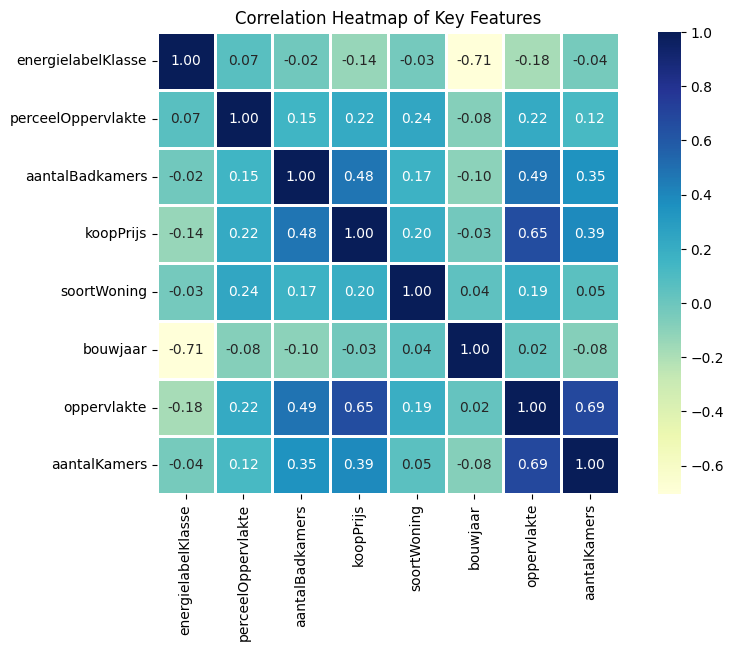

📊 **Correlation Table**



,energielabelKlasse,perceelOppervlakte,aantalBadkamers
energielabelKlasse,1.000000,0.065642,-0.016764
perceelOppervlakte,0.065642,1.000000,0.148451
aantalBadkamers,-0.016764,0.148451,1.000000
koopPrijs,-0.135055,0.215428,0.475632
soortWoning,-0.031485,0.235891,0.168551
bouwjaar,-0.705730,-0.082450,-0.101037
oppervlakte,-0.180416,0.217796,0.485632
aantalKamers,-0.035498,0.124157,0.347947


In [16]:


# Ensure the dataset is not empty
if funda_housing_df.empty:
    print("⚠️ The dataset is empty! Please check the file loading process.")
else:
    # Copy dataset to avoid modifying the original
    funda_housing_df_encoded = funda_housing_df.copy()

    # Encode 'energielabelKlasse' as ordered categories (ordinal encoding)
    energy_mapping = {'A+++++': 1, 'A++++': 2, 'A+++': 3, 'A++': 4, 'A+': 5, 'A': 6, 
                      'B': 7, 'C': 8, 'D': 9, 'E': 10, 'F': 11, 'G': 12}
    
    funda_housing_df_encoded['energielabelKlasse'] = funda_housing_df_encoded['energielabelKlasse'].map(energy_mapping)

    # Encode 'soortWoning' using category codes (nominal encoding)
    funda_housing_df_encoded['soortWoning'] = funda_housing_df_encoded['soortWoning'].astype('category').cat.codes

    # Convert 'bouwjaar' from string ranges to numerical (extract first year)
    funda_housing_df_encoded['bouwjaar'] = funda_housing_df_encoded['bouwjaar'].astype(str).str[:4].str.extract('(\d+)')
    funda_housing_df_encoded['bouwjaar'] = pd.to_numeric(funda_housing_df_encoded['bouwjaar'], errors='coerce')

    # Select relevant columns for correlation analysis
    correlation_columns = ['energielabelKlasse', 'perceelOppervlakte', 'aantalBadkamers', 'koopPrijs', 'soortWoning', 'bouwjaar', 'oppervlakte', 'aantalKamers']

    # Compute correlation matrix
    correlation_matrix = funda_housing_df_encoded[correlation_columns].corr()

    # Display the correlation heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=1, square=True)
    plt.title("Correlation Heatmap of Key Features")
    plt.show()

    # Display correlation values in a styled table
    correlation_table = correlation_matrix[['energielabelKlasse', 'perceelOppervlakte', 'aantalBadkamers']]

    # Display the formatted table
    print("📊 **Correlation Table**\n")
    display(correlation_table.style
            .set_table_styles([
                {'selector': 'th', 'props': [('background-color', '#7AD6C7'), ('color', 'black'), ('font-size', '12pt'), ('border', '0.5px solid white')]},
                {'selector': 'td', 'props': [('border', '0.5px solid white'), ('padding', '8px')]},
                {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#001923'), ('color', 'white')]},
                {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '14pt'), ('font-weight', 'bold')]}])
            .set_properties(**{'text-align': 'center'})
            .set_caption("🔍 Correlation Analysis - Key Features"))



#### <span style="color: #7AD6C7; font-size: 32px; font-family: 'Times New Roman'; font-weight: bold;">Analysis on the columns or features containing missing values</span>



#### <span style="color:#7AD6C7; font-size: 28px; font-family: 'Times New Roman'; font-weight: bold;"> A) Columns with few or low percentage of missing values:</span>

➤ **<span style="color: #7AD6C7;">koopPrijs</span>** → **0.35% missing**  
   🔹 **Action:** **Impute using median**  

➤ **<span style="color: #7AD6C7;">perceelOppervlakte</span>** → **31.77% missing**  
   🔹 **Action:** **Impute using median** 

➤ **<span style="color: #7AD6C7;">aantalBadkamers</span>** → **28.90% missing**  
   🔹 **Action:** **Impute based on mode or median imputation method** 

**<span style="color: #7AD6C7;font-size: 26px; font-family: 'Times New Roman'; font-weight: bold;">Reason for imputing these values</span>**

The missing values percentage for the house price column is **very low (0.35%)**, so the misisng values will be **imputed using the median** in order to prevent skewness in the distribution. There is a total of **31.77%** of missing values which is why dropping the column may **remove too much data**. The correlation of parcel size with price is low, it is better to impute the missing values using the median as price alone is not enough to predict the parcel area. Same will be done with the amount of bathroom, for each house, the value will be filled with the most common value found in houses with the same number of rooms, so it will be imputed with teh mode. And if no common value exists (mode), the median number of bathrooms will be used for imputation in this case. By imputing the misisng values it prevents unnecessary data loss and keeps the dataset complete. By using methods like the median (for numbers) or mode (for categories) it helps maintain data consistency without changing its overall pattern. 

#### <span style="color:#7AD6C7; font-size: 28px; font-family: 'Times New Roman'; font-weight: bold;"> B) Columns with many or high percentage of missing values:</span>

➤ **<span style="color: #7AD6C7;">energielabelKlasse</span>** → **58.00% missing**  
   🔹 **Action:** **Impute based on KNN imputation method** 

**<span style="color: #7AD6C7;font-size: 26px; font-family: 'Times New Roman'; font-weight: bold;">Reason for using KNN imputation on misisng values</span>**

K-Nearest Neighbors (KNN) imputation is mostly effective for datasets with high correlation between variables, as it estimates missing values using the 'k' nearest observations (Kashyap, 2024).

For energielabelKlasse, it has 58% missing values and it is highly correlated (-0.7) with bouwjaar (year in which it was build), which indicates that older homes tend to have worse energy ratings. Therefore, the energielabelklasses will be imputed using KNN method. Additionally, since these features are important for property pricing, large amount of missing values should be imputed using KNN instead of simple methods like median imputation. KNN will estimate missing values based on similar properties like property type, region, and bouwjaar to ensure accuracy. 

---

#### <span style="color: #7AD6C7; font-size: 30px; font-family: 'Times New Roman'; font-weight: bold;">Final Actions:</span>

| **Column** | **NaN Percentage** | **Description of how Nan values will be handled** |
|-----------|-----------------|----------------|
| **koopPrijs** | **0.35%** | **Impute (median)** |
| **perceelOppervlakte** | **31.77%** | **Impute (median)** |
| **aantalBadkamers** | **28.90%** | **Median or mode imputation method** |
| **energielabelKlasse** | **58.00%** | **KNN imputation method** |





### 3.2.4 Handling missing values



In this section the missing values will be imputed according to the imputation method decided in chpater 3.2.3

In [17]:

# Create a copy of the dataset
df_funda_imputed = funda_housing_df.copy()

# Convert categorical labels into numerical format
energy_label_mapping = {label: idx + 1 for idx, label in enumerate(sorted(df_funda_imputed['energielabelKlasse'].dropna().unique()))}
df_funda_imputed['energielabelKlasse'] = df_funda_imputed['energielabelKlasse'].map(energy_label_mapping)

# Ensure numerical columns are properly formatted for KNN
df_funda_imputed['energielabelKlasse'] = df_funda_imputed['energielabelKlasse'].astype(float)
df_funda_imputed['bouwjaar'] = df_funda_imputed['bouwjaar'].astype(float)

# Define relevant numerical features for KNN Imputation
knn_features = ['energielabelKlasse', 'bouwjaar', 'koopPrijs', 'aantalKamers']

# Apply KNN Imputation (k=5)
knn_imputer = KNNImputer(n_neighbors=5)
df_funda_imputed[knn_features] = knn_imputer.fit_transform(df_funda_imputed[knn_features])

# Round and convert back to categorical
df_funda_imputed['energielabelKlasse'] = df_funda_imputed['energielabelKlasse'].round().astype(int)
reverse_energy_label_mapping = {v: k for k, v in energy_label_mapping.items()}
df_funda_imputed['energielabelKlasse'] = df_funda_imputed['energielabelKlasse'].map(reverse_energy_label_mapping)

# Convert back to category
df_funda_imputed['energielabelKlasse'] = df_funda_imputed['energielabelKlasse'].astype('category')

# Check for remaining NaN values
nan_summary = df_funda_imputed['energielabelKlasse'].isna().sum()

if nan_summary == 0:
    print("✅ KNN Imputation (k=5) completed successfully. No missing values remain in 'energielabelKlasse'.")
else:
    print(f"⚠️ {nan_summary} missing values still exist in 'energielabelKlasse'.")

# Display first few rows
df_funda_imputed.head()


✅ KNN Imputation (k=5) completed successfully. No missing values remain in 'energielabelKlasse'.


,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening
0,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",<{woonboot}> <{vrijstaande woning}>,<{Woonhuis}>,1957.2,1,NaN,09F114F5C5EC061F6230349892132149,3.0,NaN,D,4388064,62,2018-11-12
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1980.0,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5.0,1.0,B,4388200,136,2018-08-30
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,<{tussenverdieping}> (<{appartement}>),<{Appartement}>,1943.2,0,NaN,E983FEDC63D87BF61AE952D181C8FD17,3.0,NaN,D,4399344,70,2018-11-23
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,<{Woonhuis}>,1973.0,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5.0,NaN,D,4400638,144,2018-12-14
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,<{woonboerderij}> <{vrijstaande woning}>,<{Woonhuis}>,1900.0,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8.0,1.0,E,4401765,323,2018-12-06


In [18]:


# Create a copy of the dataset
df_funda_imputed_completed = df_funda_imputed.copy()

# ----------------------- Impute koopPrijs (Median Imputation) -----------------------
df_funda_imputed_completed['koopPrijs'] = df_funda_imputed_completed['koopPrijs'].fillna(df_funda_imputed_completed['koopPrijs'].median())

# -------------------- Impute perceelOppervlakte (Hot Deck Imputation) -----------------
def hot_deck_impute(column):
    """Impute missing values using Hot Deck method (random sampling from observed values)."""
    non_missing_values = df_funda_imputed_completed[column].dropna().values
    return df_funda_imputed_completed[column].apply(lambda x: np.random.choice(non_missing_values) if pd.isna(x) else x)

df_funda_imputed_completed['perceelOppervlakte'] = hot_deck_impute('perceelOppervlakte')

# -------------------- Impute aantalBadkamers (Mode-Based Group Imputation) ---------------------
df_funda_imputed_completed['aantalBadkamers'] = df_funda_imputed_completed['aantalBadkamers'].astype(float)  # Ensure float type

# Compute the most common (mode) number of bathrooms for each number of rooms
most_common_bathrooms = df_funda_imputed_completed.groupby('aantalKamers')['aantalBadkamers'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Apply mode-based imputation
df_funda_imputed_completed['aantalBadkamers'] = df_funda_imputed_completed.apply(
    lambda row: most_common_bathrooms[row['aantalKamers']] if pd.isna(row['aantalBadkamers']) else row['aantalBadkamers'],
    axis=1
)

# Fill any remaining NaNs with the overall median
df_funda_imputed_completed['aantalBadkamers'] = df_funda_imputed_completed['aantalBadkamers'].fillna(df_funda_imputed_completed['aantalBadkamers'].median())

# Display the updated dataset
df_funda_imputed_completed.head()



,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening
0,4388064,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",<{woonboot}> <{vrijstaande woning}>,<{Woonhuis}>,1957.2,1,5135.0,09F114F5C5EC061F6230349892132149,3.0,1.0,D,4388064,62,2018-11-12
1,4388200,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1980.0,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5.0,1.0,B,4388200,136,2018-08-30
2,4399344,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,<{tussenverdieping}> (<{appartement}>),<{Appartement}>,1943.2,0,166.0,E983FEDC63D87BF61AE952D181C8FD17,3.0,1.0,D,4399344,70,2018-11-23
3,4400638,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,<{eengezinswoning}> <{geschakelde 2-onder-1-ka...,<{Woonhuis}>,1973.0,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5.0,1.0,D,4400638,144,2018-12-14
4,4401765,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,<{woonboerderij}> <{vrijstaande woning}>,<{Woonhuis}>,1900.0,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8.0,1.0,E,4401765,323,2018-12-06


In [19]:
# Check if there are any NaN values left after imputation
nan_summary = df_funda_imputed_completed.isnull().sum()

# Filter only columns that still have missing values (if any)
nan_summary = nan_summary[nan_summary > 0]

# Display results
if nan_summary.empty:
    print("✅ No missing values found in df_funda_imputed! Imputation was successful.")
else:
    print("⚠️ Some columns still have missing values:")
    print(nan_summary)



✅ No missing values found in df_funda_imputed! Imputation was successful.


## <span style="color: #8DB3B1; font-size: 36px; font-family: 'Times New Roman'; font-weight: bold;">3.3 Univariate Analysis part 1: Descriptive statistics
</span>

The descriptive statistics summary proides an overview of the numerical features in the dataset, which includes key statistical measures such as count, mean, standard deviation, minimum, quartiles, and maximum. The statistical measures gives an overview of the central tendency and spread of the data, nan values or inconsistent values, detect outliers that might affect predictive models



### 3.3.1 Descriptive statistics - comparing original and imputed dataset

In [38]:
# Drop specified columns and generate descriptive statistics
desc_funda_imputed = df_funda_imputed_completed.drop(columns=['globalId', 'globalId.1', 'bouwjaar', 'indTuin', 'oppervlakte'], errors='ignore').describe()
desc_funda_housing = funda_housing_df.drop(columns=['globalId', 'globalId.1', 'indTuin', 'oppervlakte'], errors='ignore').describe()

# Display titles and tables
display(Markdown("### Descriptive Statistics for `df_funda_imputed_completed`"))
display(desc_funda_imputed)

display(Markdown("### Descriptive Statistics for `funda_housing_df`"))
display(desc_funda_housing)

### Descriptive Statistics for `df_funda_imputed_completed`

,koopPrijs,perceelOppervlakte,aantalKamers,aantalBadkamers
count,2.116160e+05,211616.000000,211616.00000,211616.000000
mean,3.216547e+05,551.045190,4.65608,1.081927
std,2.029208e+05,2661.489782,1.58250,0.302254
min,2.150000e+02,10.000000,1.00000,1.000000
25%,2.000000e+05,143.000000,4.00000,1.000000
50%,2.750000e+05,208.000000,5.00000,1.000000
75%,3.750000e+05,347.000000,5.00000,1.000000
max,9.950000e+06,312195.000000,41.00000,8.000000


### Descriptive Statistics for `funda_housing_df`

,koopPrijs,perceelOppervlakte,aantalKamers,aantalBadkamers
count,2.108750e+05,144376.000000,211616.00000,150468.000000
mean,3.213847e+05,552.150482,4.65608,1.110927
std,2.028544e+05,2662.228965,1.58250,0.347860
min,2.150000e+02,10.000000,1.00000,1.000000
25%,2.000000e+05,143.000000,4.00000,1.000000
50%,2.750000e+05,208.000000,5.00000,1.000000
75%,3.750000e+05,347.000000,5.00000,1.000000
max,9.950000e+06,312195.000000,41.00000,8.000000


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Comparison of the data before and after imputation**</span>

Comparing both tables, teh overall mean between the imputed dataset and the original dataset does not significantly differ. Therefore, the imputation did not affect the original data or made false assumption as the averages remained almost unchanged, meaning missing values were filled in without distorting the dataset's central tendency.



#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Analysis**</span>

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">House Prices (KoopPrijs)</span>

- The average cost of houses is **€321,655**, but prices range from as low as **€215** to a maximum of **€9.95 million**!  
- There is **a high variation** in prices, as shown by the **standard deviation (€202,854)**.  
- In short, this dataset contains a wide range of different house types, the data shows houses that were sold at very affordable prices to ultra-luxurious houses or properties.

---

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Land Size (PerceelOppervlakte)</span>

- As it can be seen from the table above, the **average property size** is **552 m²**, but the largest property has a total of **312,195 m²**, which is a massive difference in square meters.  
- However, most houses or properties sold have **land sizes between 143 m² and 348 m²**, so the massive properties are few or not **frequently sold**.

---

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Number of Rooms (AantalKamers)</span>

- Most of the houses sold had an average of **4 rooms**, which could indicate these were houses for families and not single people.  
- However, some houses have up to **41 rooms**, these are **mansions or commercial properties** sold for high prices on Funda.

---

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">Number of Bathrooms (AantalBadkamers)</span>

- Most houses have **1 bathrooms**.  
- On the other hand, **high-end properties** have up to **8 bathrooms**.  

---

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Conclusion**</span>

This dataset shows that Funda sells a wide range of house types, ranging from **affordable homes, standard family houses, to high-end luxury properties**. However, as the lowest price of houses is 215 euros, this could indicate that it might be price per square meter, which is why further investigation must be made on these low prices to check wether it is indicate din the description if its price per meter or a garage. 
```


### 3.3.2 Investigating house prices

On funda the lowest house price to be found is around 59,000 euros. which can be found in the link below: 

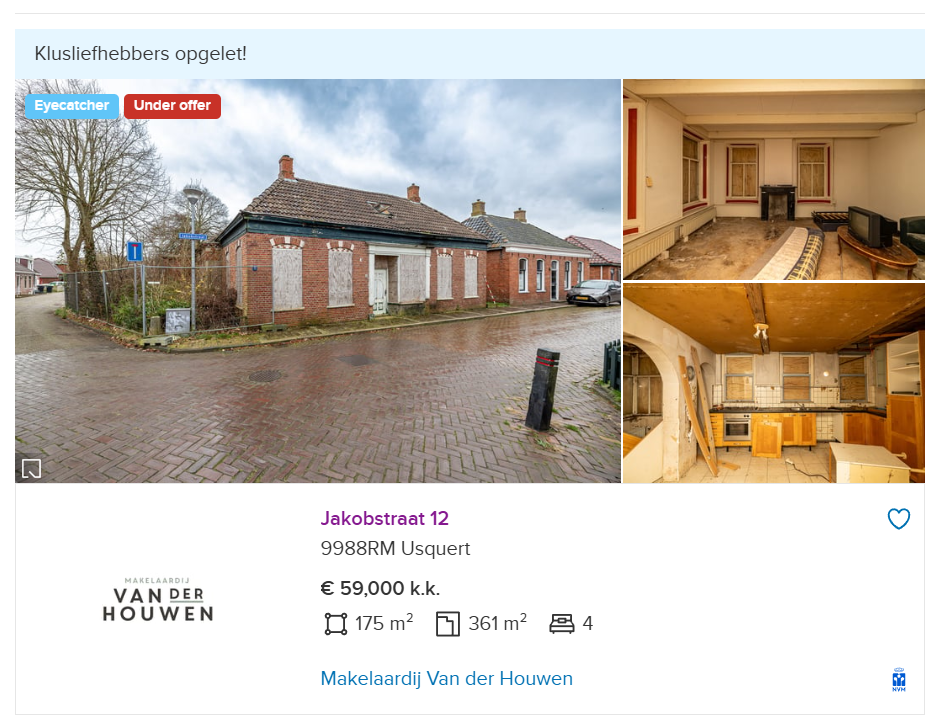
https://www.funda.nl/en/zoeken/koop?selected_area=[%22nl%22]&price=%220-75000%22&object_type=[%22house%22,%22apartment%22]&sort=%22price_up%22

Therefore, it will be checked how many houses were sold below 50,000 euros. 

In [21]:
# Count rows where 'koopPrijs' is less than 50,000 euros
below_50k_count = df_funda_imputed[df_funda_imputed['koopPrijs'] < 50000].shape[0]

# Print the result
print(f"Number of properties priced below €50,000: {below_50k_count}")

Number of properties priced below €50,000: 28


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Analysis**</span>

In total 28 properties were sold below 50,000 euros. The values of how low the price is will be analysed first and depending on the lowest values the description of these properties will be further investigated.

---

In [39]:
# Filter rows where 'koopPrijs' is below 50,000 euros
below_50k_houses = df_funda_imputed[df_funda_imputed['koopPrijs'] < 50000]

# Sort the filtered rows by 'koopPrijs' in ascending order
below_50k_houses_sorted = below_50k_houses.sort_values(by='koopPrijs', ascending=True)

display(below_50k_houses_sorted)



,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening
39908,4209762,2018-05-08,1316JT,215.0,"LET OP: De genoemde vraagprijs is een zogenaamde ""bieden vanaf"" prijs.\n\nU bent welkom op het Open Huis van zaterdag 12 mei 2018 tussen 13.00 uur en 14.00 uur. Daarna kunt u een schriftelijk bod uitbrengen tot donderdag 17 mei 2018.\n\nGoed onderhouden en uitstekend gelegen eengezinswoning met berging en parkeerplaats, alsmede tuinvergroting. De woning ligt met de tuin op het zuiden grenzend aan de gemeentelijke groenstrook en de busbaan. Aan de voorzijde is er uitzicht op een groot\nplantsoen. De woning is ideaal gelegen op korte afstand van de wijkvoorzieningen en twee buurtwinkelcentra. De bushalte is om de hoek en de wijk heeft directe toegang tot de Markerdreef kruispunt Hoge Ring.\n\nIndeling\nEntree met voordeur, ruime hal met extra ruimte in de voormalige aangebouwde berging, meterkast, toilet en vaste trap naar de verdiepingen. Ruime tuingerichte woonkamer met deur naar de achtertuin. Aan de voorzijde is de keuken gelegen met hoekkeuken voor het raam.\n\nEerste verdieping\nOverloop met vaste trap naar zolder. Op deze verdieping zijn drie ruime slaapkamers gesitueerd, alsmede de verbouwde badkamer (2012).\n\nTweede verdieping\nOverloop met traphek, groot dakraam, wasmachine aansluiting, afgewerkte zolderkamer met groot dakraam.\n\nTuin\nVoortuin: fraai aangelegd met sierbestrating en parkeerplaats op eigen terrein.\nAchtertuin: fraai aangelegde diepe achtertuin van bijna 20 meter lang met sierbestrating, borders, bomen en stevige schuttingen, grote houten tuinberging.\n\nBijzonderheden\n- Goed onderhouden woning met veel ruimte;\n- Uitstekende ligging met veel privacy in de achtertuin.\n- Extra tuinvergroting in eigendom\n- Goed afgewerkt met laminaatvloeren, stucwerk op de wanden.\n- Moderne witte hoekkeuken met aanrechtblad, spoelbak, keramische kookplaat, afzuigkap, vaatwasser, oven, koelkast en vriezer.\n- Verbeterde badkamer afgewerkt met lichtgrijze wandtegels tot plafond en ingericht met inloopdouche, staand toilet en wastafelmeubel.\n- Afgewerkte zolderkamer met vinyl, radiator en dakraam.\n- Extra bergruimte op de overloop en ventilator.\n\nOplevering in overleg",<{eengezinswoning}> <{tussenwoning}>,<{Woonhuis}>,1984.0,1,195.0,40196290EF57831AD0A9F35E25B876FC,5.0,NaN,C,4209762,103,2018-06-01
125980,4265896,2018-06-22,7737PE,25000.0,vrijstaande recreatiebungalow met ondergrond en tuin.,<{bungalow}> <{vrijstaande woning}>,<{Woonhuis}>,1998.0,0,248.0,F1668BF34B9A2F3201E525F186B31C76,3.0,NaN,B,4265896,50,2018-06-21
65462,4192579,2018-04-21,3941AA,29000.0,"PARK BOSWIJK 215\n\nIn Park Boswijk, een geweldig seniorencomplex kan men op een onbezorgde, veilige en comfortabele manier zelfstandig wonen met alle voorzieningen in de nabijheid. Hierbij moet u denken aan een restaurant, supermarkt, postkantoor, wasserette, kapsalon, verpleegkundige zorg thuis en in geval van nood tijdelijke opname op de in het wooncomplex aanwezige ziekenafdeling. Bovendien zijn er diverse servicefaciliteiten zoals huishoudelijke- en technische hulp en maaltijdbezorging.\n\nOp een rustige unieke locatie op de begane grond gelegen, bieden wij u een 2-kamer serviceappartement, type galerij aan in gebouw G2. Een leuk gelegen appartement met een ruim op het westen gelegen terras. De woonkamer biedt uitzicht op een prachtige bossage.\nIndeling:\nEntree: vanuit de entree heeft men toegang tot de slaapkamer, huiskamer en de badkamer.\nWoonkamer: Ruime woonkamer welke een fraai uitzicht biedt over de tuin.\nKeuken: eenvoudige keuken\nSlaapkamer: ruime kamer welke toegang biedt tot de badkamer.\nBadkamer: eenvoudige badkamer\nHet ruime terras is gelegen op het westen\nIn het souterrain bevindt zich nog een aparte berging. \n\nBasisservicekosten: € 190,- p.mnd. \nVoorschot

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Analysis of the prices given in the table above**</span>

As it can be seen from the table aboce the lowest price is 215 euros, however it is followed by 25000 euros. Therefore, the description of some of these will be analysed to have an idea what kind of property might it be.

---

In [23]:
# Define the list of specific globalId values
globalId_list = [4209762, 4434381, 4062322, 4361298,4090710,4229454,4192579	]

# Filter the DataFrame for the specified globalId values
selected_rows = df_funda_imputed[df_funda_imputed['globalId'].isin(globalId_list)]

# Select only relevant columns and display full descriptions
selected_rows = selected_rows[['globalId', 'koopPrijs', 'volledigeOmschrijving']]

# Ensure 'volledigeOmschrijving' is fully displayed (without truncation)
import pandas as pd
from IPython.display import display

pd.set_option('display.max_colwidth', None)  # Ensures full text is shown
display(selected_rows)


,globalId,koopPrijs,volledigeOmschrijving
4401,4062322,39500.0,"Mooi perceel op eigen grond, vrij en rustig gelegen in bosrijk Veluwe. \nTe midden van mooie natuur, goede voorzieningen en faciliteiten op een prachtig recreatiepark ''. Direct tegenover ingang park de Hoge Veluwe, koningsweg 14 in Schaarsbergen (Arnhem). Centrale ligging op het park. Mooie stadsparken, Burgers Zoo en het Nationaal Park op loop- en fietsafstand. \n\nOnderhoudsvrij vrijstaand chalet (model Unique) met schuifpui naar terras \nBouwjaar 2008, 40 m2, houten opbouw met kunststof/canexel afgewerkt en met poly tuil pannen gedekt, kunststof kiep/kantelramen, isolatieglas, geheel voorzien van laminaat, leidingwerk vorstvrij geïsoleerd, moderne badkamer voorzien van douche, wastafel, design radiator en toilet, ouderslaapkamer voorzien van ruime inbouwkast met schuifdeuren, met voldoende ruimte voor campingbedje, kinderslaapkamer met twee ruime bedden en een kast, moderne open keuken met veel opbergruimte, woonkamer voorzien van erker en schuifpui naar terras en inbouwspots. \n\nDeze woning is vervaardigd van hoogwaardig onderhoudsvrij materiaal. De kozijnen zijn van kunststof en voorzien van dubbele beglazing. Daardoor is de woning uitstekend geïsoleerd.\nDe woning is bijzonder geschikt voor verhuurdoeleinden, hetgeen garant staat voor een optimaal rendement. Onze professionele verhuurorganisatie verzorgt de volledige verhuur voor u. Vraag onze aankoopadviseur naar meer informatie.\n\nEigen parkeerplaats;\nMooi aangelegde tuin met sierbestrating;\nRuime houten berging (5m2 | type blokhut); \nU bepaalt zelf of u tuinonderhoud aan ons uitbesteedt. \n\nIndien wenselijk kan het chalet volledig gemeubileerd en gestoffeerd overgenomen worden. Perceel kan als beleggingsobject aangekocht worden en verhuurd worden door het park (onder goede condities). \n\nExtra informatie:\nWelkom op Droompark Hooge Veluwe!\nEen toplocatie op de Veluwe en op steenworp afstand van de binnenstad van Arnhem: Droompark Hooge Veluwe, pal tegenover de ingang van Het Nationale Park De Hoge Veluwe. Even lekker weg op deze locatie is een voorrecht en al bij voorbaat een succes. U kunt zich hier helemaal uitleven.. of gewoon lekker niets doen natuurlijk!\nHeel veel te doen op de Veluwe\nKom genieten en neem een duik in het zwembad, ga relaxen in de wellness of ga lekker eten in het restaurant. Maar het grootste natuurgebied van Nederland heeft nog veel meer voor u in petto. Boek een van de speciale fietsarrangementen, maak eindeloze wandelingen door de natuur of ga kanovaren en nog veel meer."
26581,4090710,45000.0,"In het centrum van Den Helder gelegen tussenwoning, ideaal voor de handige klusser.\n\nBIEDEN VANAF: € 45.000,- k.k.\n\nDeze tussenwoning met aanbouw en 3 slaapkamers is gunstig gelegen in het stadscentrum van Den Helder op korte afstand van het NS-station.\n\nEventueel kunt u een dakterras realiseren op de aanbouw, zodat u hier heerlijk beschut van de zon kunt genieten.\n\nOp de begane grond zijn via de hal met trap naar de verdieping, 2 trapkasten en de groepenkast, de woonkamer (kamer en suite) en de aanbouw toegankelijk.\n\nIn de aanbouw met bevinden zich de keukenruimte met oud keukenblokje en een los gasfornuis, een tussenruimte met achterentree en het toilet en vervolgens de bijkeuken/bergruimte met deur, Vaillant geiser en doucheruimte.\n\nDe eerste verdieping van de woning met een dakkapel aan de voorzijde beschikt over 3 slaapkamers.\n\nVanaf de overloop is de bergzolder te bereiken.\n\nDe tuin is op het zuidwesten gelegen en heeft een achterom via een steeg vanaf en naar de Californiestraat.\n\nWilt u op deze plek een fraaie stadswoning realiseren? Neem dan contact op met Van Keulen Makelaars!\n\nAanvaarding: in overleg, kan op korte termijn.\n\nInteresse in dit huis? Maak een afspraak voor een bezichtiging of schakel direct uw eigen NVM-aankoopmakelaar in. Uw NVM-aankoopmakelaar komt op voor úw belang en bespaart u tijd, geld en zorgen."
39908,4209762,215.0,"LET OP: D


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Summary of the descriptions shown in the table above**</span>




| row#     | Global ID | Price (€)  | Description Summary |
|--------|----------|------------|---------------------|
| 4401   | 4062322  | 39,500     | Chalet located at Hoge Veluwe Park. |
| 26581  | 4090710  | 45,000     | Fixer-upper townhouse in Den Helder, ideally for renovators. |
| 39908  | 4209762  | 215        | Well-maintained single-family home with garden, the house is to be auctioned starting from 215 euros. |
| 45621  | 4361298  | 49,000     | House in need of full renovation, deep backyard, no heating and has an open-plan layout. |
| 121180 | 4229454  | 29,500     | Small recreational house in The Hague, located in a park and it is not meant for permanent residence. |
| 141162 | 4434381  | 35,000     | Former small shop on a historic site, potential for office or practice space, not for living. |
| 65462  | 4192579  | 29000      | Senior living complex with 2 rooms, various services and amenities are included     |

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Conclusion**</span>

Most of the houses or properties offered are either old house that needs extensive renovation or to be sold as office or recreational properties not menat for living. Also some of these low priced properties are small appartments to be sold for senior people only. Therefore, all these are still properties that are sold at low price. However as the property offered at 215 euros as starting price, it cannot be checked wether if its per meter or teh total cannot be calculated, therefore this row will be dropped as it is not the total price. 

In [24]:
# Drop the row where koopPrijs is 215
funda = df_funda_imputed_completed[df_funda_imputed_completed['koopPrijs'] != 215]

# Sort in ascending order based on koopPrijs (or any preferred column)
funda_cleaned = funda.sort_values(by='koopPrijs', ascending=True)

# Display the first row of the sorted DataFrame
funda_cleaned.head(1)

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,soortWoning,categorieObject,bouwjaar,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,globalId.1,oppervlakte,datum_ondertekening
125980,4265896,2018-06-22,7737PE,25000.0,vrijstaande recreatiebungalow met ondergrond en tuin.,<{bungalow}> <{vrijstaande woning}>,<{Woonhuis}>,1998.0,0,248.0,F1668BF34B9A2F3201E525F186B31C76,3.0,1.0,B,4265896,50,2018-06-21


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Observation**</span>

The row was indeed dropped now the lowest price in the dataset is 25000 euros.

## <span style="color: #8DB3B1; font-size: 36px; font-family: 'Times New Roman'; font-weight: bold;">3.4 Univariate Analysis part 2: Data's distribution visualization 
</span>

In this section a basic plot of the data is displayed in which it shows the distribution of each columns and in 3.4.2 it shows a comparison  of the columns before and after imputing them. 

### 3.4.1 Plotting all columns/ features

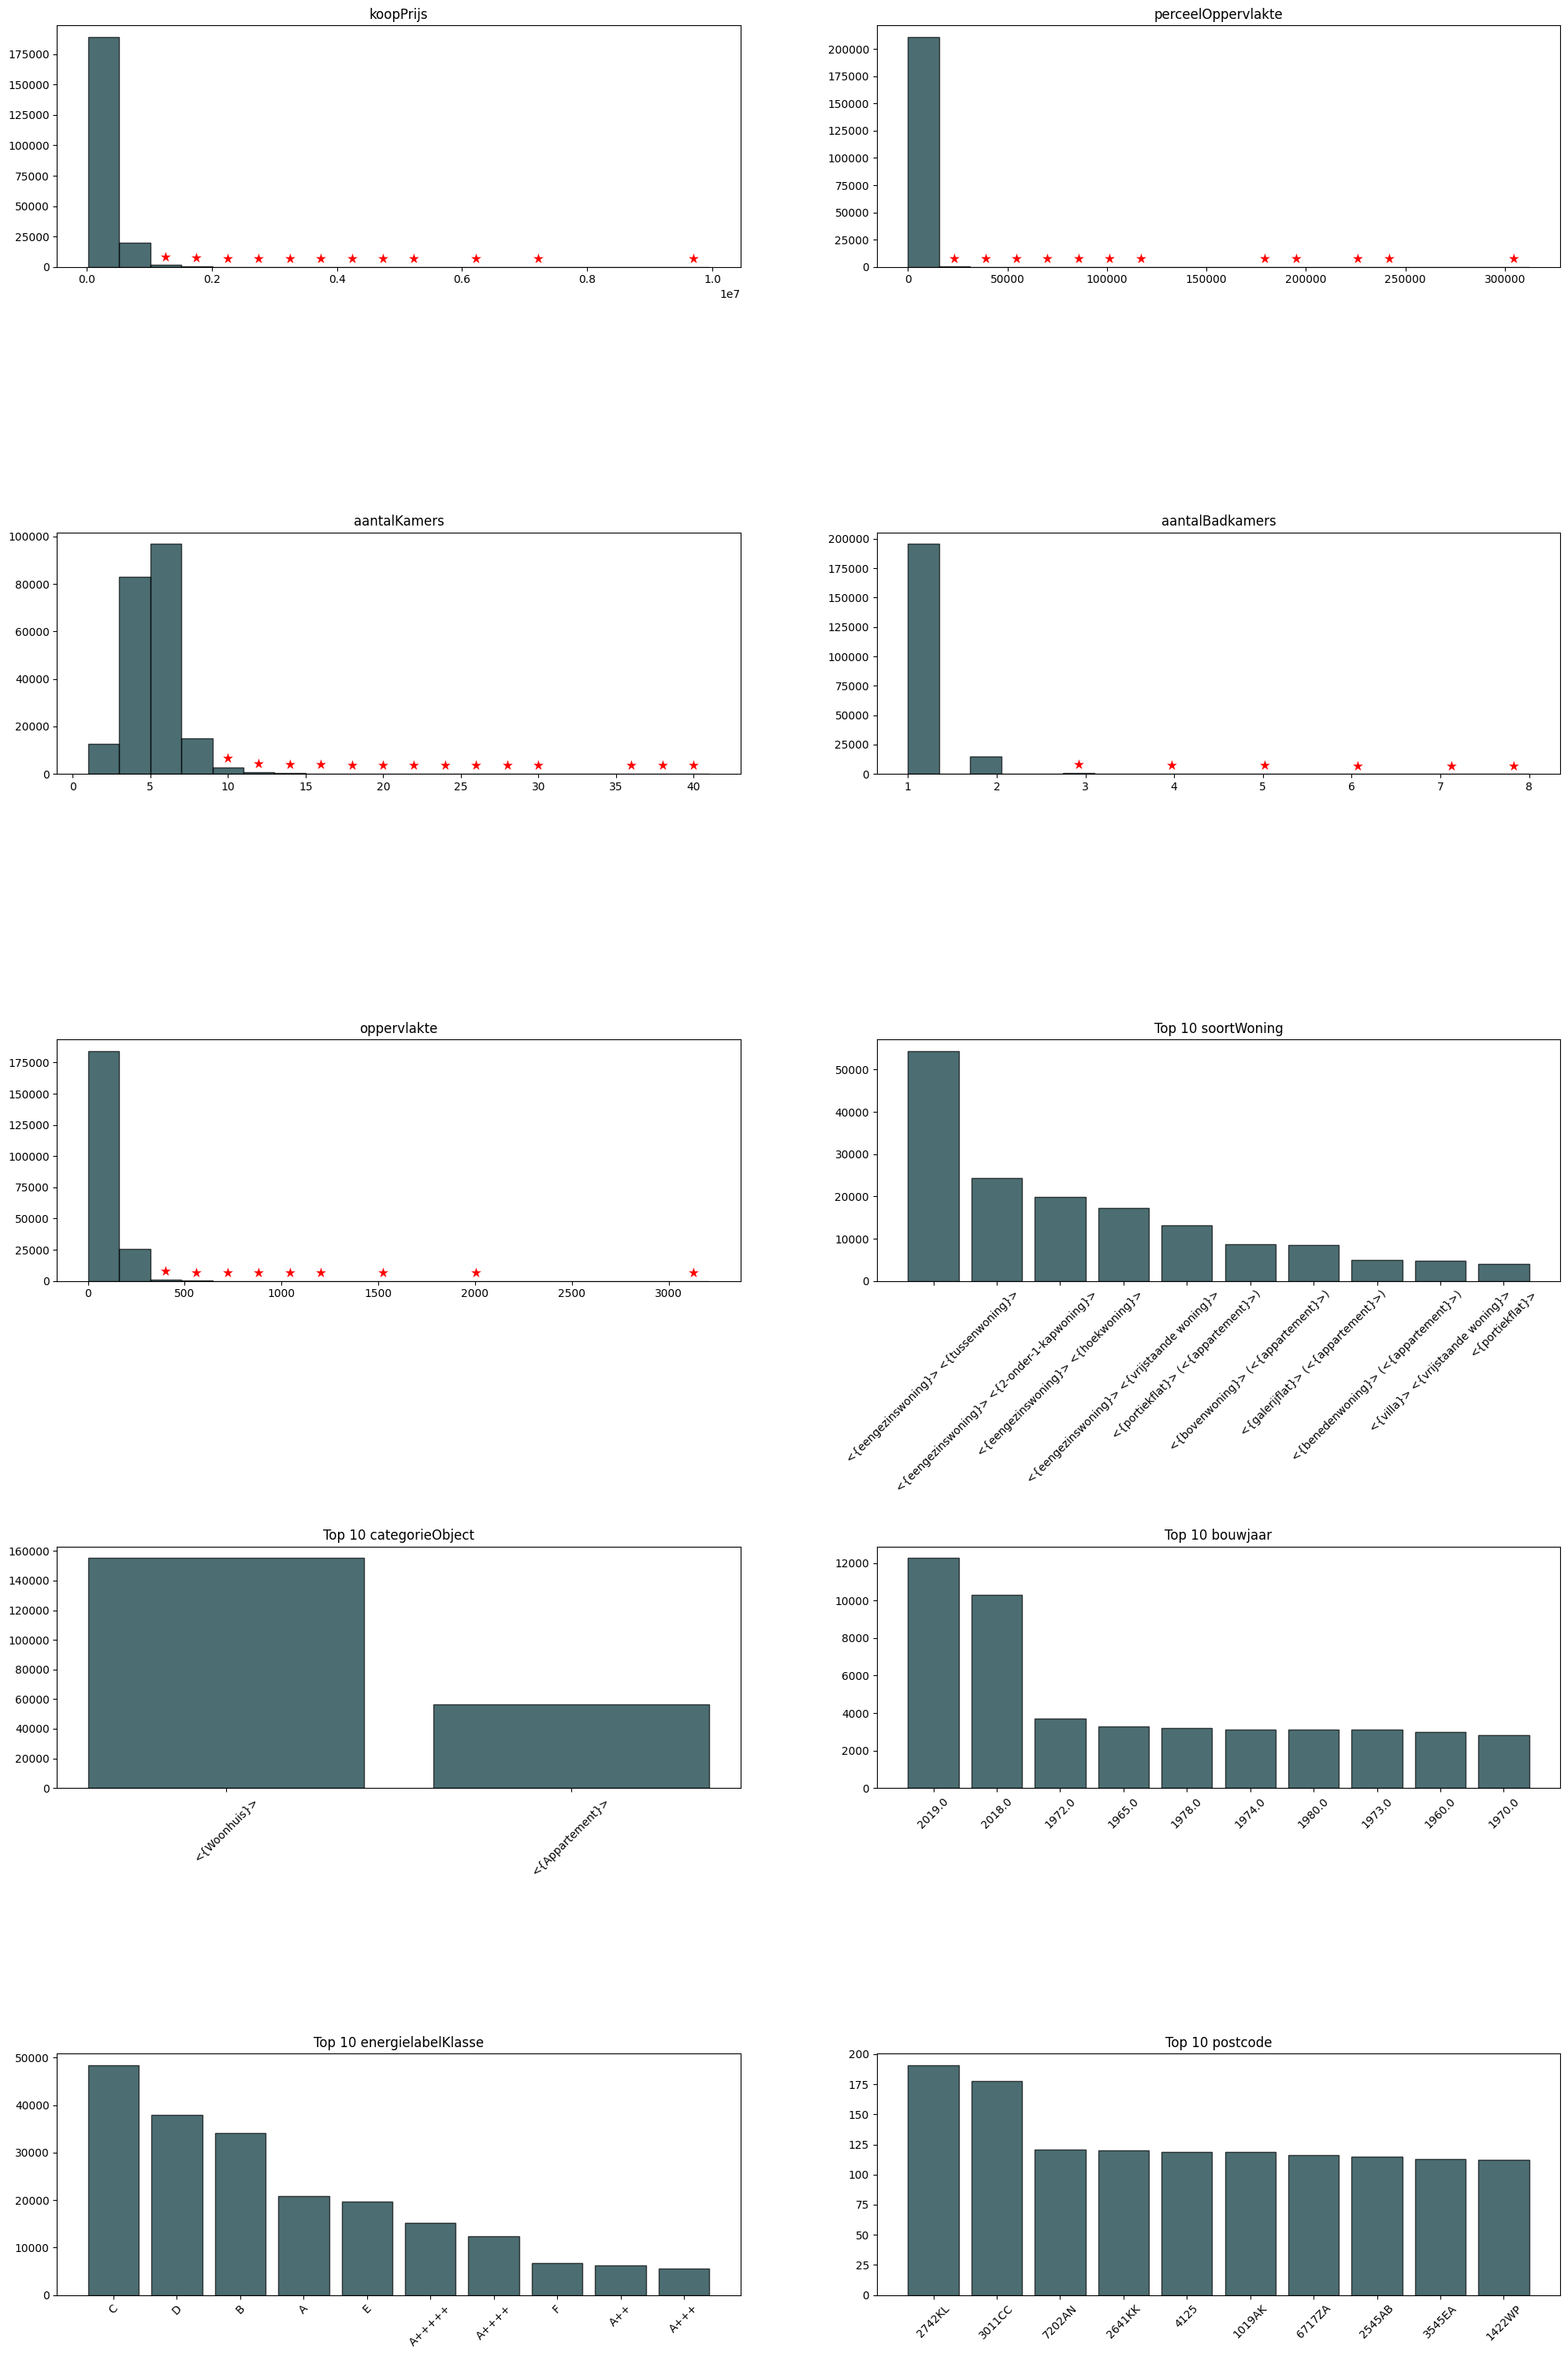

In [25]:
# Source chatgpt

# Define numerical and categorical features for visualization
numerical_features = [
    'koopPrijs', 'perceelOppervlakte', 'aantalKamers', 'aantalBadkamers', 'oppervlakte'
]

categorical_features = ['soortWoning', 'categorieObject', 'bouwjaar', 'energielabelKlasse', 'postcode']

# Set up figure with 2 columns for better layout
fig, axes = plt.subplots(nrows=(len(numerical_features) + len(categorical_features)) // 2, 
                         ncols=2, figsize=(20, 30), dpi=100)
axes = axes.flatten()

# Define an icon (simple star) to indicate very small bars
icon = "★"

# Plot numerical features as histograms
for i, feature in enumerate(numerical_features):
    data = funda_cleaned[feature].dropna()
    counts, bins, patches = axes[i].hist(data, bins=20, color='#003038', edgecolor='k', alpha=0.7)
    axes[i].set_title(feature, fontsize=12)

    # Add stars for small bars
    for count, patch in zip(counts, patches):
        if count > 0:
            height = patch.get_height()
            x_position = patch.get_x() + patch.get_width() / 2
            if height < 5000:  # Show a star for small bars (adjusted threshold for better visibility)
                axes[i].text(x_position, height + 500, icon, ha='center', va='bottom', fontsize=12, color='red')

# Plot categorical features as bar charts (Top 10 values only)
for i, feature in enumerate(categorical_features):
    index = len(numerical_features) + i  # Continue from the next available subplot
    counts = funda_cleaned[feature].value_counts().head(10)  # Limit to top 10 categories
    bars = axes[index].bar(counts.index.astype(str), counts.values, color='#003038', edgecolor='k', alpha=0.7)
    axes[index].set_title(f"Top 10 {feature}", fontsize=12)

    # Rotate x-axis labels for readability
    axes[index].tick_params(axis='x', labelrotation=45)

    # ✅ **Do NOT add stars for categorical features**
    
# Remove unused subplots if any
for i in range(len(numerical_features) + len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better readability
plt.tight_layout()
plt.subplots_adjust(hspace=1.1, wspace=0.2)  # Increased hspace for more vertical spacing

# Show the plots
plt.show()




#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';">Feature Distributions and Interpretations (Funda Housing Dataset)</span>**  

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';">**Graphs Visual Layout Explanation** </span>**   4

The graphs above show the distribution of the categorical and numerical columns or features. 

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';">**Icon Representation in the Code:**</span>**

#### **<span style="color:#7AD6C7; font-size:28px; font-family:'Times New Roman';">Star (<span style="color:red;">★</span>) Icon Usage</span>**  

The **<span style="color:red;">red star (★)</span>** indicates or show the **bars that are too small to be visible** in the graphs, and it helps to visualize **low-frequency data points** so that these data point are **not overlooked** and remain part of the analysis.  

---

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';">Description of Distribution Type</span>**  

The image below shows the distribution type or direction of a graph (Gupta, 2022). 

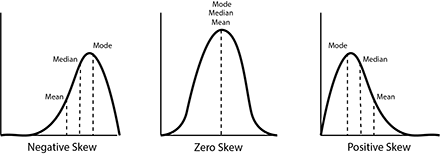  

---

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';"> Numerical Features</span>**  

1. **<span style="color:#7AD6C7;">koopPrijs (Purchase Price)</span>**  
   - **Distribution**: Highly skewed to the right, with most values concentrated at the lower end.  
   - **Interpretation**: Most properties have a lower price range, while only a few are high-value properties.  

2. **<span style="color:#7AD6C7;">perceelOppervlakte (Total land area or parcel size in m²)</span>**  
   - **Distribution**: Right-skewed, a large amount or ratio of the houses sold have mostly a small parcel area while a small number of properties have extremely large parcel sizes.  
   - **Interpretation**: Most properties have smaller land areas and only few properties have a large parcel size.  

3. **<span style="color:#7AD6C7;">aantalKamers (Number of Rooms)</span>**  
   - **Distribution**: Slight right skew, with a peak between 4–6 rooms.  
   - **Interpretation**: The graph shows that the majority of houses have between 4 and 6 rooms.

4. **<span style="color:#7AD6C7;">aantalBadkamers (Number of Bathrooms)</span>**  
   - **Distribution**: Right-skewed, most values are concentrated at **1 or 2 bathrooms**.  
   - **Interpretation**: Most houses in this dataset have between 1 or 2 bathrooms, but few properties have above 4 bathrooms.  

5. **<span style="color:#7AD6C7;">oppervlakte (Living Area in m²)</span>**  
   - **Distribution**: Slightly right-skewed. 
   - **Interpretation**: Most houses have reasonable indoor space, while a few large properties a large living area.  


---

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';"> Categorical Features</span>**  

6. **<span style="color:#7AD6C7;">Top 10 soortWoning (House Type)</span>**  
   - **Observation**: `Eengezinswoning` (Single-family homes) is the predominant type of housing.  
   - **Interpretation**: Most of the houses are **family-oriented houses**, followed by a smaller proportion of other property types.  

7. **<span style="color:#7AD6C7;">Top 10 categorieObject (Property Category)</span>**  
   - **Observation**: The dataset is mainly divided into `Woonhuis` (Houses) and `Appartement` (Apartments), as it was also shown in chapter 3.3.  
   - **Interpretation**: From the graph it can be seen that most of the properties are houses and is followed by a lower share or ratio of apartments.  

8. **<span style="color:#7AD6C7;">Top 10 bouwjaar (Construction Year)</span>**  
   - **Observation**: Most properties were built in the **2018 and 2019**, while much less houses were build during 1970 and 2000.  
   - **Interpretation**: The graphs shows that most properties sold by Funda are **modern as well as old properties**.  

9. **<span style="color:#7AD6C7;">Top 10 energielabelKlasse (Energy Label Class)</span>**  
   - **Observation**: **C and D** labels are the most common energy label class.  
   - **Interpretation**: From the graph it can be seen that most of the properties sold have a **moderate to very effcient energy label**, however there is still a small but significant amount of houses with **very inefficient energy label**, namely energy label F.  

10. **<span style="color:#7AD6C7;">Top 10 postcode (Postal Codes)</span>**  
    - **Observation**: In the top 10 postal codes it can be seen that most properties are sold in certain locations.  
    - **Interpretation**: Some areas have significantly more listings such as the postal code 2742KL and 3011CC, and it is followed by a significant number of properties that were sold the remaining postal codes, which could indicates that these are the top location with high amount of abailable properties to be sold.  

---

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';"> Next steps</span>**  

- **The imputed distrubtion will be compared with the orginal one in chapter 3.4.2**  

---
---


### 3.4.2 Plotting the distribution difference of the dataset before and after imputation

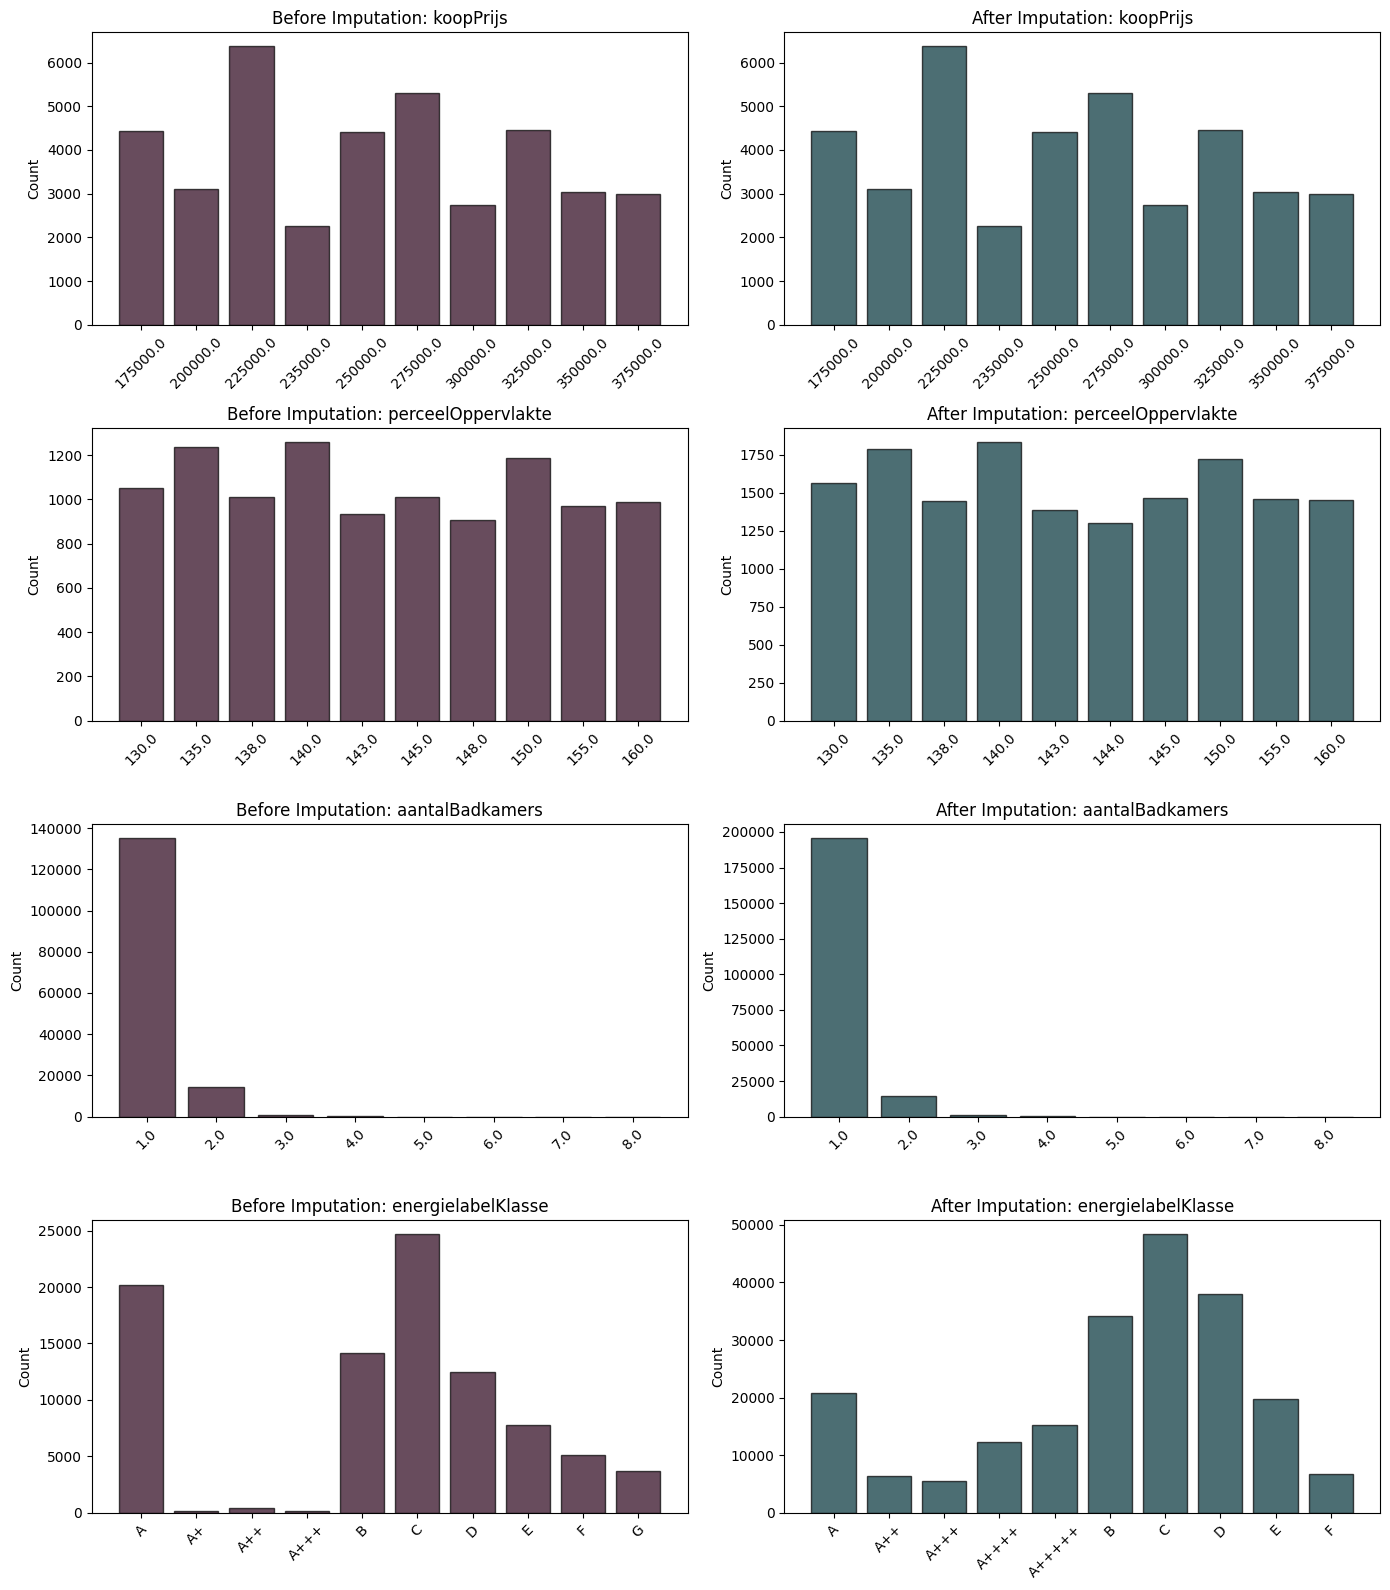

In [26]:
# Source chatgpt

import pandas as pd
import matplotlib.pyplot as plt

# List of columns that were imputed
imputed_columns = ['koopPrijs', 'perceelOppervlakte', 'aantalBadkamers', 'energielabelKlasse']

# Set up figure with 2 columns for comparison
fig, axes = plt.subplots(len(imputed_columns), 2, figsize=(14, len(imputed_columns) * 4))

# Loop through each imputed column and create bar charts
for i, col in enumerate(imputed_columns):
    # Get value counts before and after imputation (limit to top 10 for better readability)
    before_counts = funda_housing_df[col].value_counts().nlargest(10).sort_index()
    after_counts = funda_cleaned[col].value_counts().nlargest(10).sort_index()

    # Plot before imputation
    axes[i, 0].bar(before_counts.index.astype(str), before_counts.values, color='#280019', alpha=0.7, edgecolor='k')
    axes[i, 0].set_title(f"Before Imputation: {col}")
    axes[i, 0].set_ylabel("Count")
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Plot after imputation
    axes[i, 1].bar(after_counts.index.astype(str), after_counts.values, color='#003038', alpha=0.7, edgecolor='k')
    axes[i, 1].set_title(f"After Imputation: {col}")
    axes[i, 1].set_ylabel("Count")
    axes[i, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';"> Observation</span>**  


The imputation did not affect the data distribution as it remained almost unchanged, meaning missing values were filled in without distorting the dataset, while also increasing completeness. 



## <span style="color: #8DB3B1; font-size: 36px; font-family: 'Times New Roman'; font-weight: bold;">3.5 Bivariate Analysis: Analysing price dependency
</span>

In this section the following plots show the relationship between koopPrijs (purchase price) and key features, such as number of bathrooms, number of rooms, energy efficiency label, and whether the house has a garden or not. 

C:\Users\josel\AppData\Local\Temp\ipykernel_18068\2145596539.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
C:\Users\josel\AppData\Local\Temp\ipykernel_18068\2145596539.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
C:\Users\josel\AppData\Local\Temp\ipykernel_18068\2145596539.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
C:\Users\josel\AppData\Local\Temp\ipykernel_18068\2145596539.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


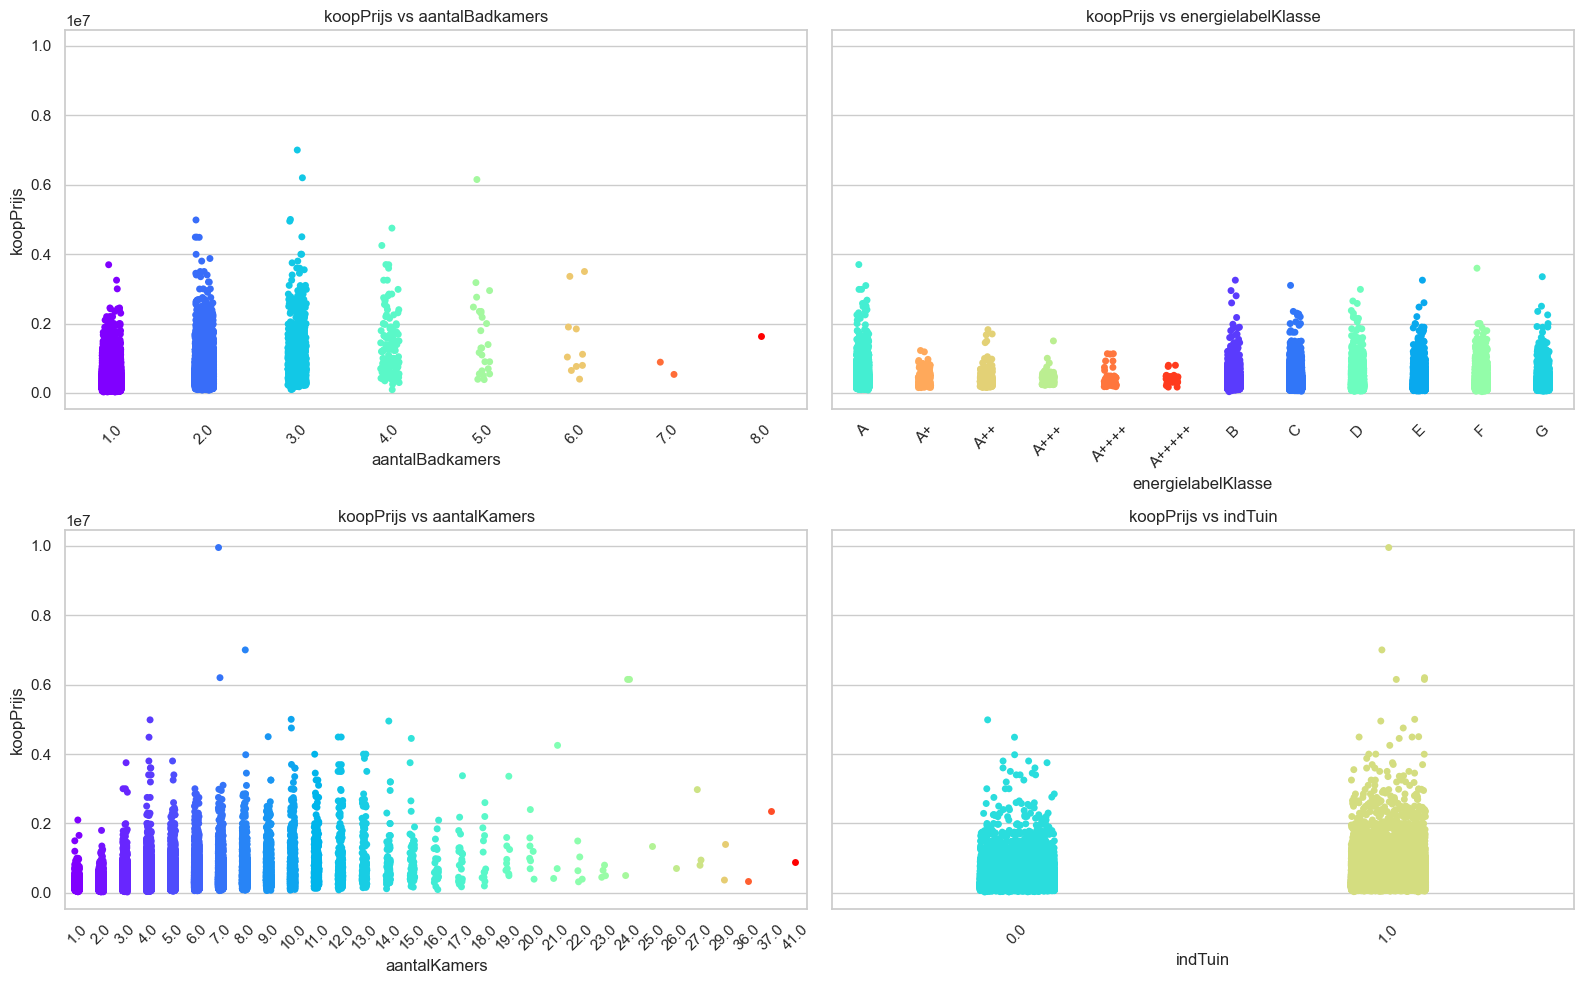

In [27]:

# Set seaborn style
sns.set(style="whitegrid")

# Define x-axis columns
x_columns = ['aantalBadkamers', 'energielabelKlasse', 'aantalKamers', 'indTuin']

# Calculate the number of rows needed (2 plots per row)
num_cols = 2
num_rows = math.ceil(len(x_columns) / num_cols)

# Create subplots with 2 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 5 * num_rows), sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Generate colorful strip plots
for ax, col in zip(axes, x_columns):
    sns.stripplot(x=funda_cleaned[col], y=funda_cleaned['koopPrijs'], hue=funda_housing_df[col], palette="rainbow", ax=ax, jitter=True)
    ax.set_title(f'koopPrijs vs {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend([],[], frameon=False)  # Hide legend to avoid clutter

# Hide any unused subplots
for i in range(len(x_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()




#### <span style="color: #7AD6C7; font-size: 32px; font-family: 'Times New Roman'; font-weight: bold;">Analysis on how housing features impacts price</span>  

➤ **<span style="color: #7AD6C7;">AantalBadkamers (Number of Bathrooms)</span>** → **Price increases with bathrooms up to 4-5, then flattens**  
   🔹 **Insight:** More bathrooms generally lead to higher prices, but having more bathrooms doesnt necessarily adds more value.  

➤ **<span style="color: #7AD6C7;">EnergielabelKlasse (Energy Efficiency Class)</span>** → **Prices are spread across energy labels**  
   🔹 **Insight:** While energy-efficient homes might be better or preferred, there are however no significant price differences among houses with different energy labels.  

➤ **<span style="color: #7AD6C7;">AantalKamers (Number of Rooms)</span>** → **Price increases with rooms up to 6, then fluctuates**  
   🔹 **Insight:** More rooms generally means a higher price but till a certain point, other factors might also impact the overall price.  

➤ **<span style="color: #7AD6C7;">IndTuin (Has a Garden)</span>** → **Having a garden or not does not strongly impact price**  
   🔹 **Insight:** High value properties do not have a garden, meaning having a garden doenst necessarily suggests that a property might be more expensive, other factors like size and location might have more infulence on the price.  

**<span style="color: #7AD6C7;font-size: 26px; font-family: 'Times New Roman'; font-weight: bold;">Conclusion</span>**  

None of these features show a strong dependency on price, meaning if the price is higher the features do not increase together with it. As the **number of rooms and bathrooms** appear to have some positive correlation with price, but **the effect diminishes beyond a certain point**. While, **Energy efficiency does not show a strong price dependency**, which suggests that buyers do not consider this a important factor or reason for buying. Same counts for garden there is only some difference between the price of proterties with a garden and without it, but not overvarly significant.

In the next section the correlation between features will be further analysed.

---
---

## <span style="color: #8DB3B1; font-size: 48px; font-family: 'Times New Roman'; font-weight: bold;">3.6 Inferential statistics
</span>

#### **<span style="color:#7AD6C7; font-size:32px; font-family:'Times New Roman';">Inferential Statistical Methods for Feature Analysis</span>**  

#### **<span style="color:#7AD6C7; font-size:28px; font-family:'Times New Roman';">Inferential Statistics</span>**  

To assess the relationship between the target variable (`koopPrijs`) and various predictor variables,  **inferential statistical methods** will be applied. The selection of these methods depends on the nature of the predictor variables, which are:  

- **Continuous variables**: Correlation analysis such as Spearman’s or Pearson is used to measure the strength of association.  
- **Ordinal variables**: Spearman’s Rank Correlation is used for analysing monotonic relationships.  
- **Nominal variables**: The Kruskal-Wallis H-Test (or ANOVA if normality is satisfied) determines whether significant differences exist between categories.  
- **Binary variables**: Either Spearman’s Rank Correlation or the Mann-Whitney U-Test is used, depending on distributional assumptions.  
---

From the Bivariate analysis in chapter 3.5, it could not be directly concluded wether there is a strong relation between the features and the price. Therefore, further investigation will be needed by applying inferential statistics. Howeever, there are different methods for differnt type of data there for it is needed to first select which features are categorical and which ones are numerical. 


#### **<span style="color:#7AD6C7; font-size:24px; font-family:'Times New Roman';">Continuous and Ordinal Features → Spearman’s Rank Correlation or Pearson’s if normality holds</span>**  


| **Feature**             | **Type**            | **Reason for selecting these features for analysis** |
|-------------------------|--------------------|--------------------------------------------------------------|
| **oppervlakte**         | Continuous         | Larger living space may increase price |
| **perceelOppervlakte**  | Continuous         | Larger land area might increase price |
| **aantalKamers**        | Ordinal            | More rooms might increase price |
| **aantalBadkamers**     | Ordinal            | More bathrooms may lead to higher price |
| **bouwjaar**            | Ordinal            | Newer houses might be worth more, but not always linearly |
| **energielabelKlasse**  | Ordinal            | Better energy efficiency might increase value |
| **indTuin**             | Binary (0/1)       | Having a garden could impact house price |


#### **<span style="color:#7AD6C7; font-size:24px; font-family:'Times New Roman';">Categorical Features → Use Kruskal-Wallis H-Test (or ANOVA if normal)</span>**    

| **Feature**                | **Type**                | **Reason for selecting these features for analysis** |
|----------------------------|------------------------|--------------------------------------------------------------|
| **soortWoning**            | Categorical            | Different house types (apartment, villa, etc.) may have different price distributions |
| **categorieObject**        | Categorical            | Object categories may influence price |
| **postcode**               | Categorical            | Location could affect property prices |
| **publicatieDatum**        | Categorical  | Market conditions may affect price over time |
| **datum_ondertekening**    | Categorical  | Signing date might show market trends |
| **kantoor_naam_MD5hash**   | Categorical            | Some real estate agencies may handle more expensive properties |

Before running test on these features, it will be first tested if the price (koopprijs) follows a normal distribution. 
<br>This will be tested with the D’Agostino-Pearson Test, which is suitable for large datasets and it evaluates normality by measuring the skewness and kurtosis. 

#### **<span style="color:#7AD6C7; font-size:24px; font-family:'Times New Roman';">Skewness and Kurtosis</span>**  

For assesing skewness the test will give a value equal, above or below than 0, while for kurtosis the test will give a equal, above or below than 3, the outocmes will help in determining the distribution of the variable (Suvarna, 2025).

#### **<span style="color:#7AD6C7; font-size:22px; font-family:'Times New Roman';">Skewness → Measures asymmetry in the distribution.</span>**  

- **Skewness = 0** → Perfectly symmetric = normal distribution.  
- **Skewness > 0** → Right-skewed = longer right tail.  
- **Skewness < 0** → Left-skewed = longer left tail.  

#### **<span style="color:#7AD6C7; font-size:22px; font-family:'Times New Roman';">Kurtosis → Measures the "tailedness" (how extreme the outliers are).</span>**  

- **Kurtosis = 3** → Normal distribution (mesokurtic).  
- **Kurtosis > 3** → Heavy tails (more outliers, leptokurtic).  
- **Kurtosis < 3** → Light tails (fewer outliers, platykurtic).  




### <span style="color:white; font-size:35px;">**3.6.1 Assessing Normality of koopPrijs**</span>

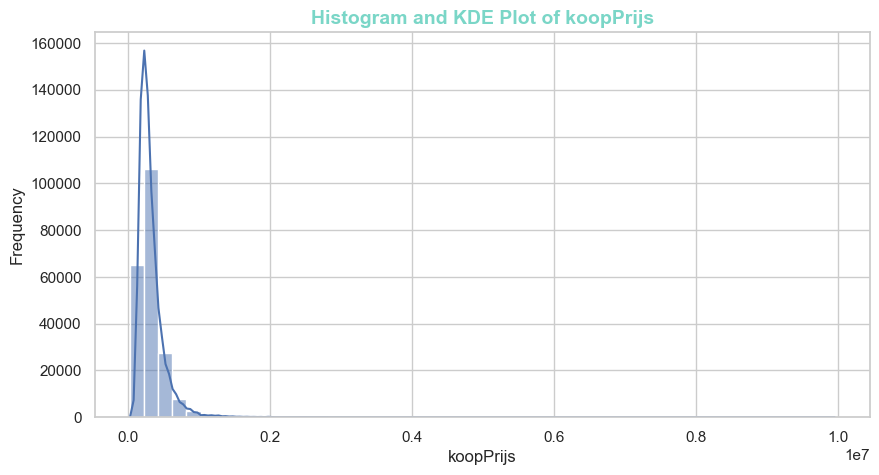

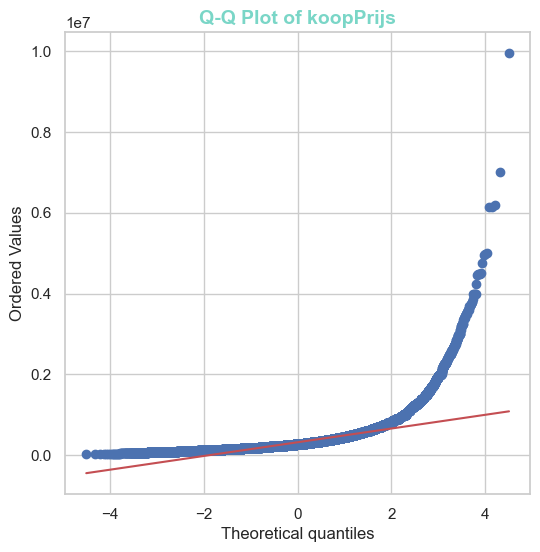

D'Agostino-Pearson Test p-value: 0.00000
Kolmogorov-Smirnov Test p-value: 0.00000
Anderson-Darling Test Statistic: 11487.50284
Critical Values (Anderson-Darling): [0.576 0.656 0.787 0.918 1.092]
Skewness: 5.11926
Kurtosis: 78.78234

========================== Interpretation ==========================
Normality Test Results

❌ The data is NOT normally distributed (p-value < 0.05).
Use non-parametric tests (e.g., Spearman’s correlation, Kruskal-Wallis H-test).



In [ ]:


# Check if 'koopPrijs' exists in the dataset
if 'koopPrijs' not in funda_cleaned.columns:
    raise ValueError("Column 'koopPrijs' not found in the dataset.")

# Remove NaN values
koopPrijs = funda_cleaned['koopPrijs'].dropna()

# 1. D'Agostino and Pearson's Test (Tests both Skewness and Kurtosis)
dagostino_stat, dagostino_p = stats.normaltest(koopPrijs)

# 2. Kolmogorov-Smirnov Test (Tests against a normal distribution)
ks_stat, ks_p = stats.kstest(koopPrijs, 'norm', args=(np.mean(koopPrijs), np.std(koopPrijs)))

# 3. Anderson-Darling Test (Tests for normality with critical values)
anderson_result = stats.anderson(koopPrijs)

# 4. Skewness and Kurtosis
skewness = stats.skew(koopPrijs)
kurtosis = stats.kurtosis(koopPrijs)

# 5. Histogram and KDE Plot
plt.figure(figsize=(10, 5))
sns.histplot(koopPrijs, bins=50, kde=True)
plt.title('Histogram and KDE Plot of koopPrijs', fontsize=14, fontweight='bold', color='#7AD6C7')
plt.xlabel('koopPrijs', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 6. Q-Q Plot (Quantile-Quantile Plot)
plt.figure(figsize=(6, 6))
stats.probplot(koopPrijs, dist="norm", plot=plt)
plt.title("Q-Q Plot of koopPrijs", fontsize=14, fontweight='bold', color='#7AD6C7')
plt.show()

# Define ANSI escape codes for colors in terminal output
BLUE = "\033[38;2;122;214;199m"  # Custom Blue #7AD6C7
RED = "\033[91m"
GREEN = "\033[92m"
YELLOW = "\033[93m"
BOLD = "\033[1m"
RESET = "\033[0m"  # Reset formatting


# Display numerical results with bold formatting
print(f"{BOLD}D'Agostino-Pearson Test p-value:{RESET} {dagostino_p:.5f}")
print(f"{BOLD}Kolmogorov-Smirnov Test p-value:{RESET} {ks_p:.5f}")
print(f"{BOLD}Anderson-Darling Test Statistic:{RESET} {anderson_result.statistic:.5f}")
print(f"{BOLD}Critical Values (Anderson-Darling):{RESET} {anderson_result.critical_values}")
print(f"{BOLD}Skewness:{RESET} {skewness:.5f}")
print(f"{BOLD}Kurtosis:{RESET} {kurtosis:.5f}")

# Interpretation with larger fonts and color
print(f"\n{BOLD}{BLUE}========================== Interpretation =========================={RESET}")
print(f"{BOLD}{BLUE}Normality Test Results{RESET}")

if dagostino_p < 0.05 or ks_p < 0.05:
    print(f"\n{BOLD}{RED}❌ The data is NOT normally distributed (p-value < 0.05).{RESET}")
    print(f"{BOLD}{YELLOW}Use non-parametric tests (e.g., Spearman’s correlation, Kruskal-Wallis H-test).{RESET}")
else:
    print(f"\n{BOLD}{GREEN}✅ The data appears to be normally distributed (p-value > 0.05).{RESET}")
    print(f"{BOLD}{YELLOW}You can use parametric tests (e.g., Pearson’s correlation, ANOVA).{RESET}")

print(f"{BOLD}{BLUE}===================================================================={RESET}\n")




#### **<span style="color:#7AD6C7; font-size:28px; font-family:'Times New Roman';">Next Steps After Normality Testing</span>**  

The test indicates that the `koopPrijs` variable does not follows a **normal distribution**.  

#### **<span style="color:#7AD6C7; font-size:24px; font-family:'Times New Roman';"> `koopPrijs` is NOT Normally Distributed as the `p-value < 0.05`</span>**  
- Therefore, **Spearman’s Rank Correlation** will be performed instead of Pearson’s.  
- And **Kruskal-Wallis H-Test** will be used for categorical values instead of ANOVA. 


### <span style="color:white; font-size:35px;">**3.6.2 Performing Spearman correlation test**</span>

Before performing the test, the date needs to be converted to `datetime` because **Spearman’s rank correlation requires numerical or ordinal data**, and dates stored as `object` (strings) which cannot be properly ranked or used in mathematical operations.

In [ ]:
#Checking the actual date format in the dataset
def check_date_formats(funda_cleaned, date_columns):
    """
    Checks unique formats in date columns and prints examples.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing date columns
    date_columns (list): List of columns to check
    """
    for col in date_columns:
        if col in funda_cleaned.columns:
            print(f"\n🔍 Checking column: {col}")
            sample_values = funda_cleaned[col].dropna().astype(str).unique()[:10]  # Get unique samples
            for val in sample_values:
                print(f"  Example: {val}")
        else:
            print(f"⚠️ Column '{col}' not found in DataFrame.")

# Define your suspected date columns
date_columns = ['publicatieDatum', 'datum_ondertekening']  # Adjust based on your dataset

# Run the function
check_date_formats(funda_cleaned, date_columns)



🔍 Checking column: publicatieDatum
  Example: 2018-06-22
  Example: 2018-04-21
  Example: 2018-05-25
  Example: 2018-01-10
  Example: 2018-10-10
  Example: 2018-07-23
  Example: 2018-09-07
  Example: 2018-03-28
  Example: 2018-01-22
  Example: 2018-02-27

🔍 Checking column: datum_ondertekening
  Example: 2018-06-21
  Example: 2018-05-15
  Example: 2018-10-05
  Example: 2018-02-15
  Example: 2018-12-19
  Example: 2018-07-27
  Example: 2018-11-07
  Example: 2018-04-25
  Example: 2018-02-09
  Example: 2018-02-27


In [ ]:
#converting the object type to date type
funda_cleaned['publicatieDatum'] = pd.to_datetime(funda_cleaned['publicatieDatum'], format='%Y-%m-%d', errors='coerce')
funda_cleaned['datum_ondertekening'] = pd.to_datetime(funda_cleaned['datum_ondertekening'], format='%Y-%m-%d', errors='coerce')


In [34]:
def check_datetime_conversion(df, date_columns):
    """
    Checks if date columns are properly converted to datetime dtype.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing date columns
    date_columns (list): List of columns to check
    """
    for col in date_columns:
        if col in df.columns:
            print(f"\n🔍 Checking column: {col}")
            print(f"  📌 Data Type: {df[col].dtype}")  # Should be datetime64[ns]
            print(f"  🗓️  First 5 values:\n{df[col].head()}")  # Show first few values
        else:
            print(f"⚠️ Column '{col}' not found in DataFrame.")

# Define your date columns
date_columns = ['publicatieDatum', 'datum_ondertekening']  # Adjust based on your dataset

# Run the check
check_datetime_conversion(funda_cleaned, date_columns)



🔍 Checking column: publicatieDatum
  📌 Data Type: datetime64[ns]
  🗓️  First 5 values:
125980   2018-06-22
65462    2018-04-21
121180   2018-05-25
25058    2018-01-10
160634   2018-10-10
Name: publicatieDatum, dtype: datetime64[ns]

🔍 Checking column: datum_ondertekening
  📌 Data Type: datetime64[ns]
  🗓️  First 5 values:
125980   2018-06-21
65462    2018-05-15
121180   2018-10-05
25058    2018-02-15
160634   2018-12-19
Name: datum_ondertekening, dtype: datetime64[ns]


#### **<span style="color:#7AD6C7; font-size:28px; font-family:'Times New Roman';">Next steps:</span>**  

- The data type of these two column is now in the right format. So now the spearman test can be performed.

In [40]:
import pandas as pd
import scipy.stats as stats

# Ensure funda_cleaned is a copy to avoid modifying the original dataset
funda_cleaned = funda_cleaned.copy()

# Checking the data types to identify necessary adjustments
data_types = funda_cleaned.dtypes

# Identifying categorical columns that need adjustments
columns_to_adjust = {}

for col in funda_cleaned.columns:
    if data_types[col] == 'object':
        unique_values = funda_cleaned[col].nunique()
        if unique_values < 20:  # Arbitrary threshold for categorical encoding
            funda_cleaned[col] = funda_cleaned[col].astype("category").cat.codes  # Convert to categorical codes
            columns_to_adjust[col] = "Encoded as categorical"
        else:
            columns_to_adjust[col] = "Needs further segmentation"

# ✅ Convert date columns to numeric (timestamps) for Spearman correlation
date_columns = ['publicatieDatum', 'datum_ondertekening']  # Adjust as needed
for col in date_columns:
    if col in funda_cleaned.columns:
        funda_cleaned[col] = funda_cleaned[col].astype('int64') // 10**9  # Convert datetime to Unix timestamp (seconds)
        columns_to_adjust[col] = "Converted to Unix timestamp for correlation"

# Running Spearman’s Rank Correlation for the selected features
selected_features = [
    'oppervlakte', 'perceelOppervlakte', 'aantalKamers', 
    'aantalBadkamers', 'bouwjaar', 'energielabelKlasse', 'indTuin',
    'publicatieDatum', 'datum_ondertekening'  # ✅ Included date columns
]

# Ensure koopPrijs exists in the dataset
if 'koopPrijs' not in funda_cleaned.columns:
    raise KeyError("Column 'koopPrijs' is missing from the dataset.")

# Drop NaNs to avoid issues in correlation calculations
funda_cleaned = funda_cleaned.dropna(subset=['koopPrijs'])

# Creating a dictionary to store correlation results
spearman_results = {}

for feature in selected_features:
    if feature in funda_cleaned.columns:
        valid_data = funda_cleaned[[feature, 'koopPrijs']].dropna()  # Ensure no NaNs in selected features
        if not valid_data.empty:
            spearman_corr, spearman_p = stats.spearmanr(valid_data[feature], valid_data['koopPrijs'])
            spearman_results[feature] = {
                "Spearman Correlation": spearman_corr,
                "p-value": spearman_p
            }

# Convert results to DataFrame for display
spearman_results_df = pd.DataFrame.from_dict(spearman_results, orient='index')

# Display the correlation results
print("\n📌 **Spearman Correlation Results** 📌")
print(spearman_results_df)

# Convert column adjustments to DataFrame
adjustments_df = pd.DataFrame(
    list(columns_to_adjust.items()), columns=["Column", "Adjustment Suggestion"]
)

# Display the adjustment suggestions
print("\n📌 **Data Adjustments Suggestions** 📌")
print(adjustments_df)



📌 **Spearman Correlation Results** 📌
                     Spearman Correlation       p-value
oppervlakte                      0.669458  0.000000e+00
perceelOppervlakte               0.269692  0.000000e+00
aantalKamers                     0.377679  0.000000e+00
aantalBadkamers                  0.291750  0.000000e+00
bouwjaar                         0.191326  0.000000e+00
energielabelKlasse              -0.299064  0.000000e+00
indTuin                          0.159017  0.000000e+00
publicatieDatum                  0.045664  4.565915e-98
datum_ondertekening              0.125527  0.000000e+00

📌 **Data Adjustments Suggestions** 📌
                Column                        Adjustment Suggestion
0      publicatieDatum  Converted to Unix timestamp for correlation
1  datum_ondertekening  Converted to Unix timestamp for correlation


## 📌 **Key Observations from the Output**  

✔️ **All selected features have a correlation value with `koopPrijs`**, including:  

- **🏠 Oppervlakte (`0.669`)** → Strong **positive** correlation with price.  
- **⚡ EnergielabelKlasse (`-0.299`)** → **Negative** correlation, meaning better energy labels might be linked to lower prices.  
- **📅 PublicatieDatum (`0.0457`)** → Very **weak correlation**, suggesting listing date has little impact on price.  
- **📝 Datum_ondertekening (`0.1255`)** → **Slight positive correlation**, possibly indicating seasonal trends.  

✔️ **All p-values are extremely low (`0.000000e+00`)**, meaning the correlations are **statistically significant**.  

✔️ **The date columns (`publicatieDatum`, `datum_ondertekening`) were successfully converted to Unix timestamps**, making them **suitable for ranking-based correlation**. 🚀  


### <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">4. Reference list </span>



Gupta, R. (2022, November 9). What are right-skewed and left-skewed distributions? Medium. https://medium.com/geekculture/what-are-right-skewed-and-left-skewed-distributions-a29b3def7598


Kashyap, P. (2024, November 14). Handling Missing values in Data: A Beginner’s Guide to KNN Imputation. Medium. https://medium.com/@piyushkashyap045/handling-missing-values-in-data-a-beginner-guide-to-knn-imputation-30d37cc7a5b7

Suvarna. (2025, January 15). Difference between skewness and kurtosis. Analytics Vidhya. Retrieved February 12, 2025, from https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/